#**WQD7003 - Group 5** 
###**Project Title: Trending and Prediction of patient admissions and discharge in Emergency Department**
######22050480 | Lee Tse Lyn
######S2190151 | Wee Hin Sheik
######17147394 | Fathia Farhana bt Agusalim
######S2196123 | Samuel Tan Joo Woon
######S2179520 | Khai Yao Wong

##Reference Link:
1. [Github Repositories](https://github.com/samueltan3972/WQD7003-Data-Analytics)
2. [Web Page](https://samueltan3972.github.io/WQD7003-DataAnalytics.html)



---


**Background**: The CRoss Industry Standard Process for Data Mining (CRISP-DM) is being applied in order to study the admission and discharge patients in emergency department at Hero DMC Heart Institute. **Two (2) types of data analytics will be executed** for this project which inclusive of **Descriptive and Predictive Analytics.**


---


##**1. Business Understanding**
There are several pain points that are experienced in the Hospital Emergency Department as follows:
*   Overcrowding of patients in the emergency rooms that exceed the optimal capacity
*   Excessive number of waiting patients to be admitted in the EDs
*   Throughput due to the time to process and/or treat patients
*   Non-urgent visits/self-referral process

**Assumptions and limitations:**
Generally, prioritisation of patient admission is based on the triage scale in which this triage is utilised in the healthcare community to categorise patients based on  the severity of their injuries i.e. category 1 (immediate), category 2 (urgent) and category 3 (non-urgent).
However, for this project, **level of triage scale** to attend patient during emergency **is excluded from the scope** as patients records from the dataset comprises categorical data that is categorised into "outpatient" and "emergency" only

###### *Note: Throughput is defined as the amount of material or items passng through a system or process*

**Business Goal:**
To aid the emergency deparment strategy on admission and discharge by providing admission prediction

**Data Mining Goal:**

*   Assess trending of patient admitted at emergency department
*   Evaluate how long patient was admitted until discharge
*   Predict how long does a patients will be admitted based on historical and patient demographical data

**Expected Outcome**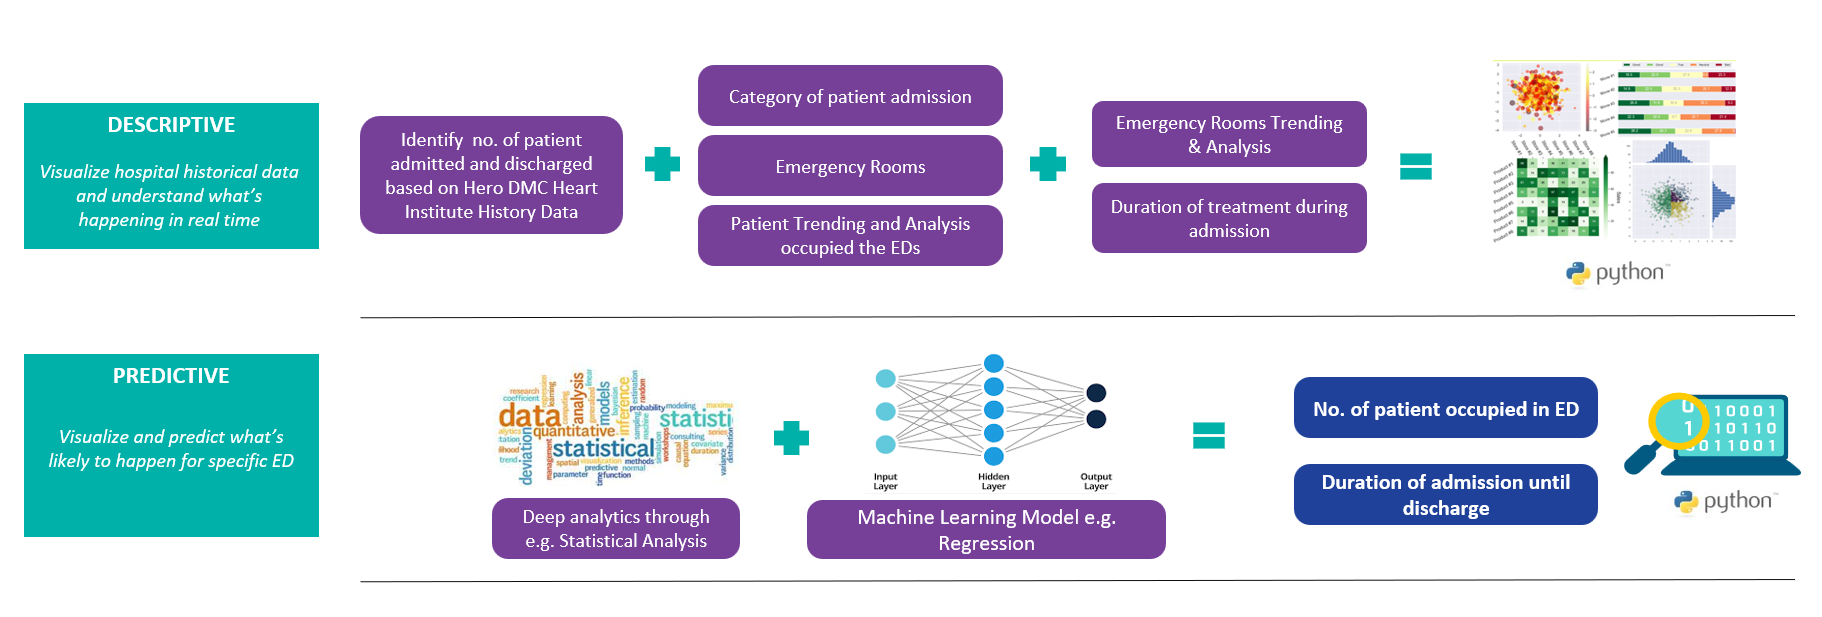

**Project Timeline:**
The project has divided the milestone into 5 sprint deliverables and expected to deploy the data products on Week 13 as Release 1.0
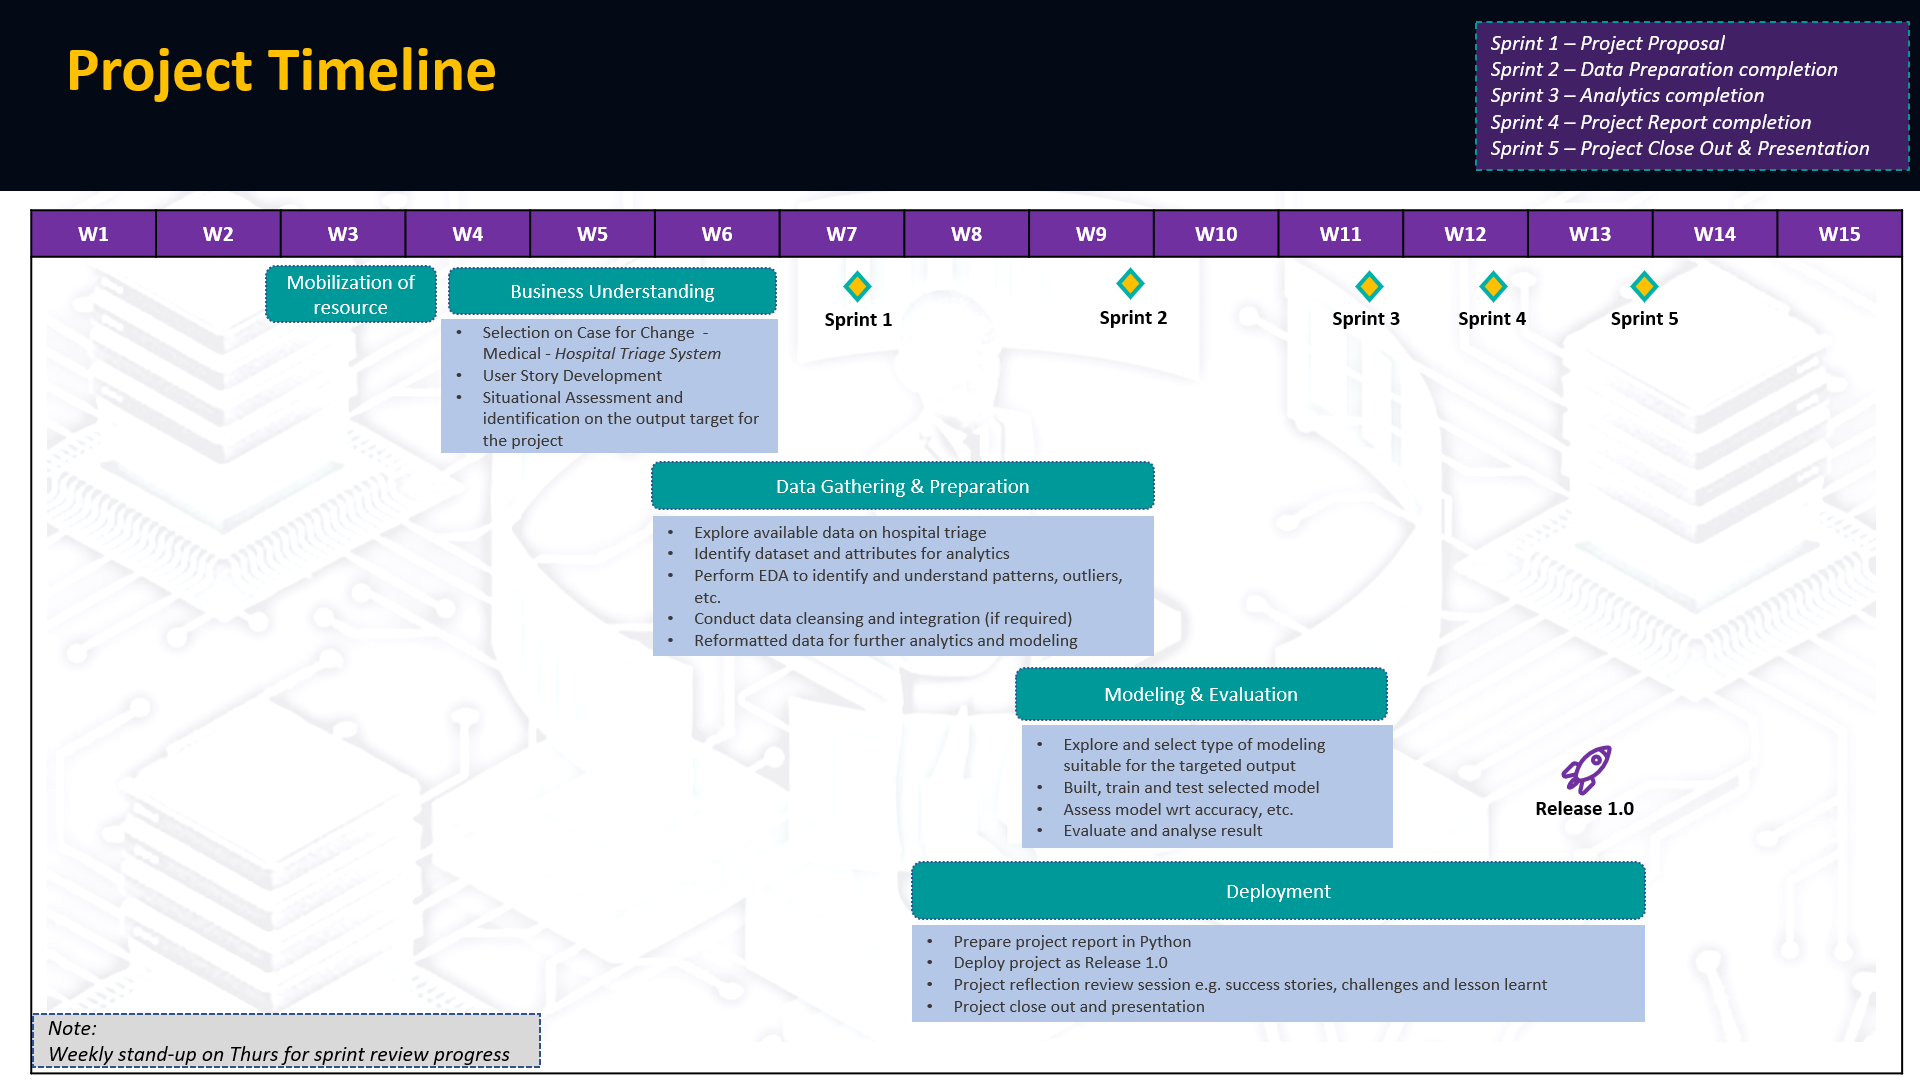



---

##**2. Data Understanding**
##### The dataset is retrieved from open source i.e., Kaggle [hospital-admissions-data](https://www.kaggle.com/datasets/ashishsahani/hospital-admissions-data)​ which consists of admission and discharge patients records from Hero DMC Heart Institute, India.  
There are a total of 15,758 rows and 56 columns available in the datasets which comprises of categorical and numerical data types. 
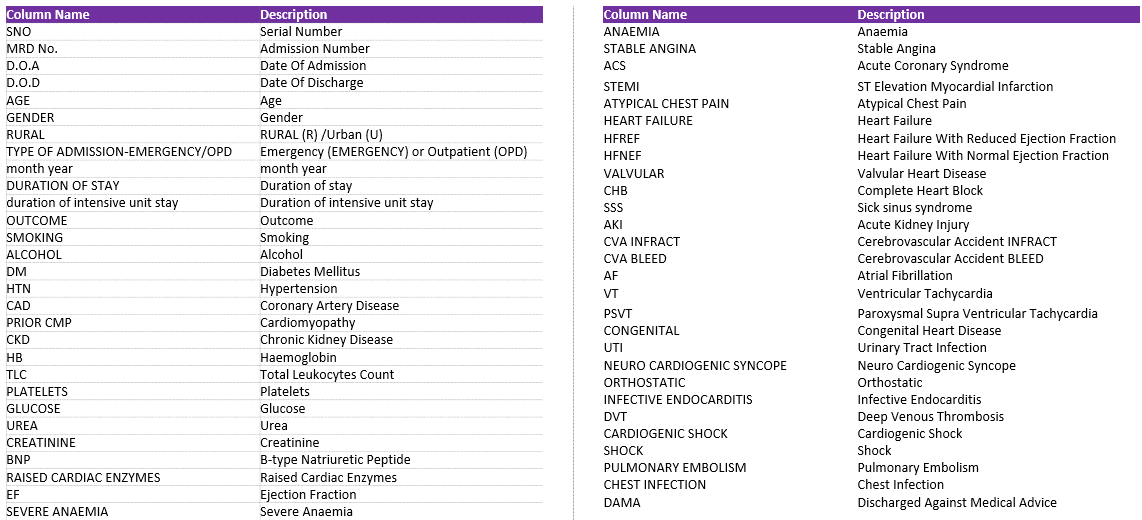

In [1]:
# Run this the first time only, it will download the project file from Github
!git clone https://github.com/samueltan3972/WQD7003-Data-Analytics.git  

fatal: destination path 'WQD7003-Data-Analytics' already exists and is not an empty directory.


In [2]:

%ls

 Volume in drive D is Hard Disk 
 Volume Serial Number is B8DE-8541

 Directory of D:\UM Master\Sem 1\Data Analytics\Temp

19/01/2023  05:28 PM    <DIR>          .
19/01/2023  05:28 PM    <DIR>          ..
16/01/2023  10:40 PM    <DIR>          .ipynb_checkpoints
19/01/2023  02:16 PM         1,336,646 output.ipynb
16/01/2023  03:38 PM               147 Polynomial.txt
16/01/2023  03:10 PM             1,253 Polynomial_1.pkl
16/01/2023  03:10 PM            20,073 Polynomial_2.pkl
16/01/2023  03:13 PM           237,003 Polynomial_3.pkl
16/01/2023  03:29 PM         2,236,207 Polynomial_4.pkl
19/01/2023  05:19 PM       139,442,728 RFmodel.pkl
19/01/2023  05:28 PM            30,695 WQD7003 Modelling.ipynb
16/01/2023  09:18 PM            44,727 WQD7003 Modelling_Final.ipynb
19/01/2023  05:22 PM        15,766,523 WQD7003_DATA_ANALYTICS_Group_5.html
19/01/2023  05:24 PM        19,287,591 WQD7003_DATA_ANALYTICS_Group_5.ipynb
19/01/2023  05:20 PM        15,771,287 WQD7003_DATA_ANALYTICS_Group_5.sl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./WQD7003-Data-Analytics/HDHI_Admission_data/HDHI_Admission_data.csv')
data.head()

SNO MRD No.     D.O.A      D.O.D  AGE GENDER RURAL  \
0    1  234735  4/1/2017   4/3/2017   81      M     R   
1    2  234696  4/1/2017   4/5/2017   65      M     R   
2    3  234882  4/1/2017   4/3/2017   53      M     U   
3    4  234635  4/1/2017   4/8/2017   67      F     U   
4    5  234486  4/1/2017  4/23/2017   60      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               E     Apr-17                 3  ...   
1                               E     Apr-17                 5  ...   
2                               E     Apr-17                 3  ...   
3                               E     Apr-17                 8  ...   
4                               E     Apr-17                23  ...   

   CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0   0                          0            0   
1           0   0                          0            0   
2           0   0                          0            0   
3           0   0                          0            0   
4           0   0                          0            0   

   INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  \
0                       0    0                  0      0                   0   
1                       0    0                  0      0                   0   
2                       0    0                  0      0                   0   
3                       0    0                  0      0                   0   
4                       0    0                  0      0                   0   

  CHEST INFECTION  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 56 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [6]:
data.shape
data.tail()

SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
15752  15753  699585  31/03/2019  04/04/2019   86      F     U   
15753  15754  699500   3/31/2019    4/1/2019   50      M     R   
15754  15755  700415  31/03/2019  09/04/2019   82      M     U   
15755  15756  699524  31/03/2019  03/04/2019   59      F     U   
15756  15757  699524  31/03/2019  03/04/2019   59      F     U   

      TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
15752                               O     Mar-19                 5  ...   
15753                               E     Mar-19                 2  ...   
15754                               E     Mar-19                10  ...   
15755                               O     Mar-19                 4  ...   
15756                               O     Mar-19                 4  ...   

       CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
15752           0   0                          0            0   
15753           0   0                          0            0   
15754           0   0                          0            0   
15755           0   0                          0            0   
15756           0   0                          0            0   

       INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
15752                       0    0                  0      0   
15753                       0    0                  0      0   
15754                       0    0                  0      0   
15755                       0    0                  0      0   
15756                       0    0                  0      0   

       PULMONARY EMBOLISM CHEST INFECTION  
15752                   0               0  
15753                   0               0  
15754                   0               0  
15755                   0               0  
15756                   0               0  

[5 rows x 56 columns]

In [7]:
#data[SMOKING']value_counts()
# Permanently changes the pandas settings
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

data.loc[:, 'CHEST INFECTION'].value_counts()

0    15415
1      341
\        1
Name: CHEST INFECTION, dtype: int64

In [8]:
data.GLUCOSE.describe()

count     14894
unique      521
top         110
freq        270
Name: GLUCOSE, dtype: object

**Automated exploraty data analysis**

This step is being done to get quick high level overview on the data

In [9]:
# !pip install sweetviz

In [10]:
# # Run below if facing issue with matplotlib with sweetviz
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3

                                             |                                             | [  0%]   00:00 ->…


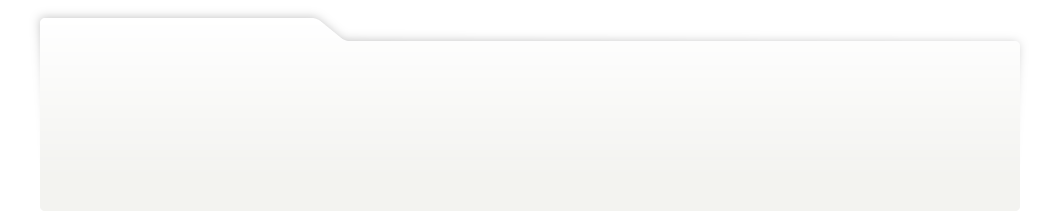
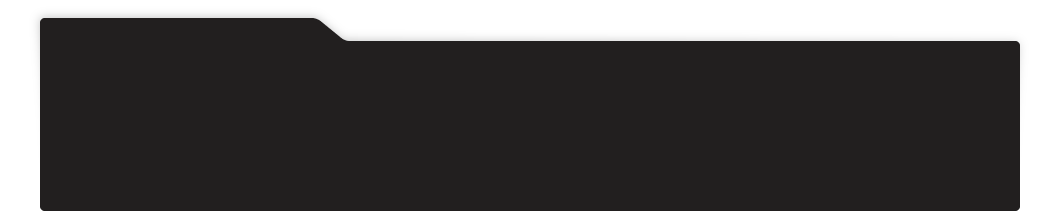
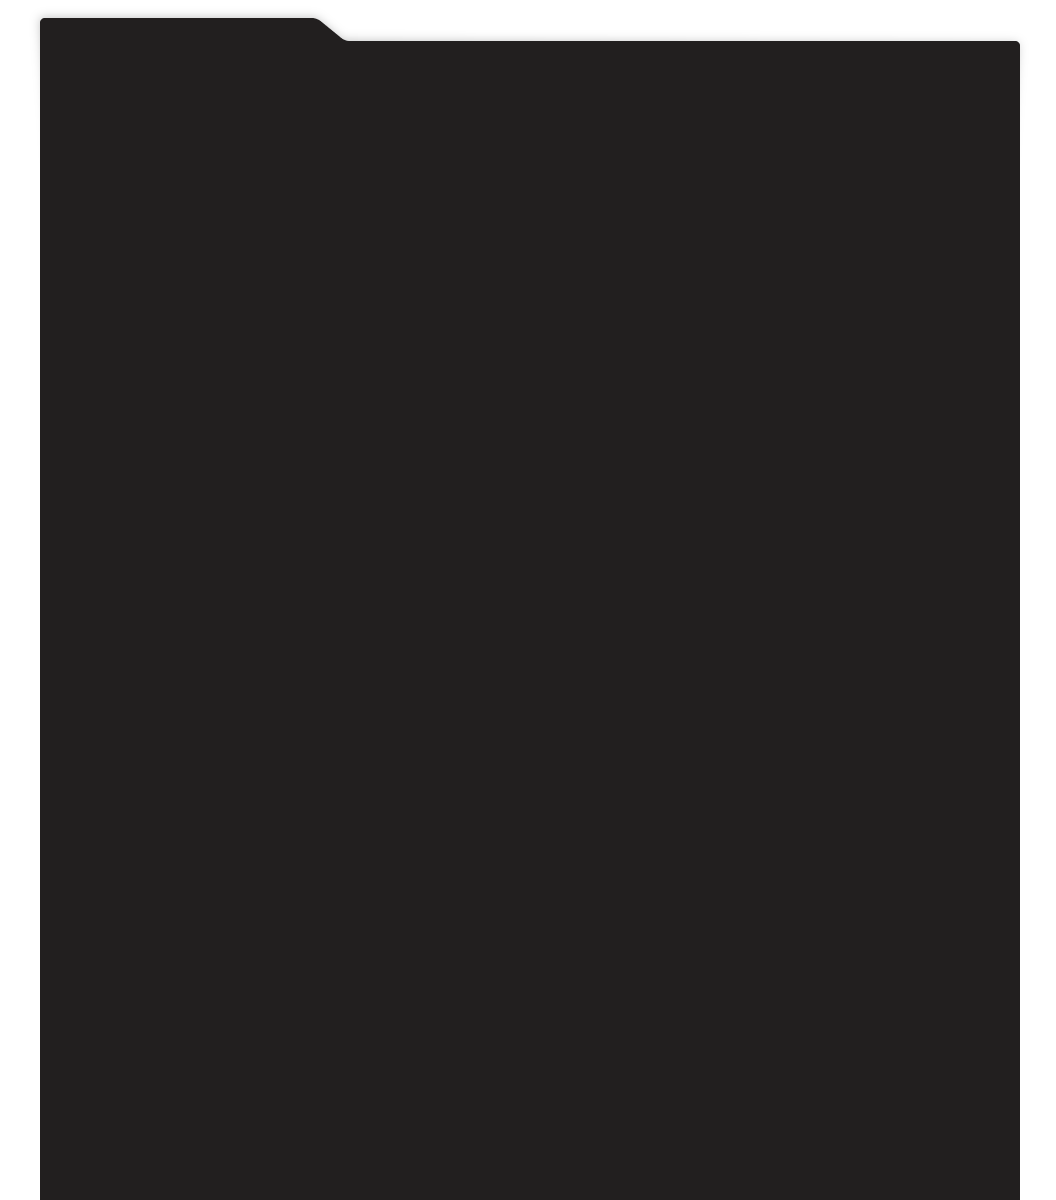
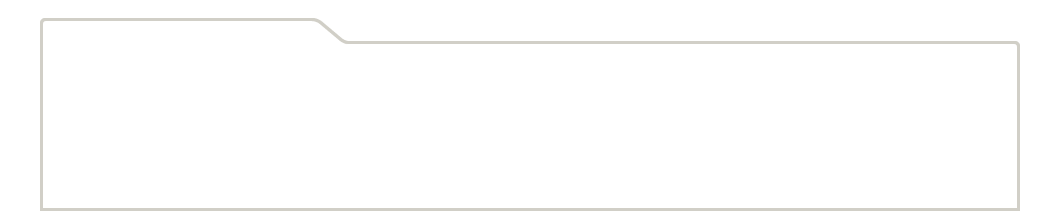
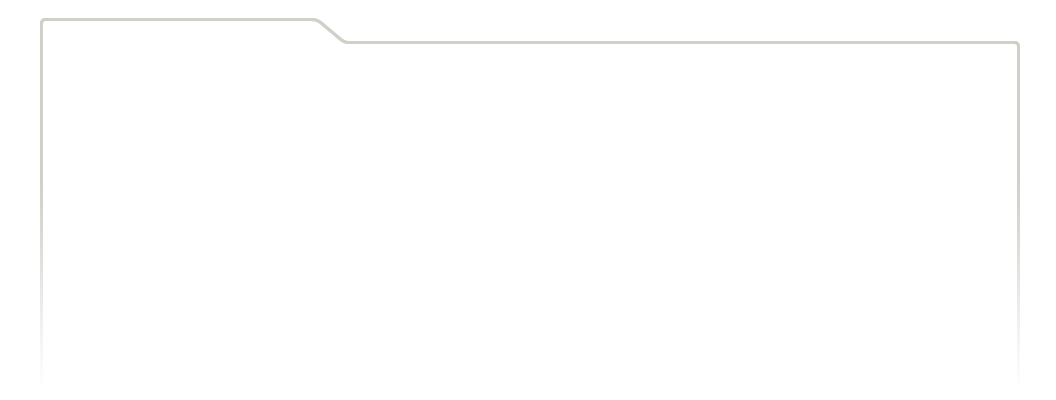
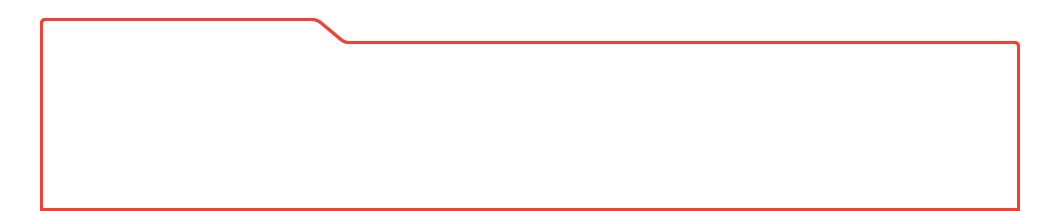
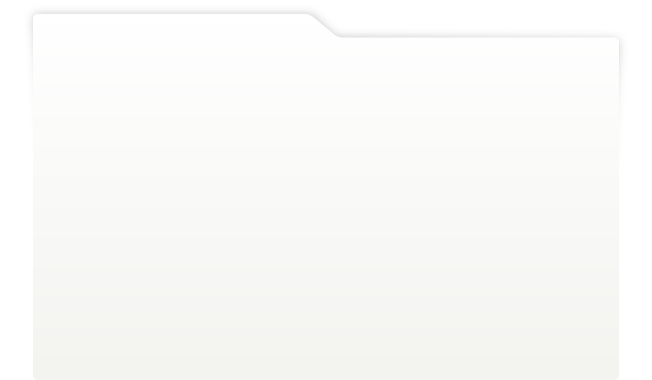
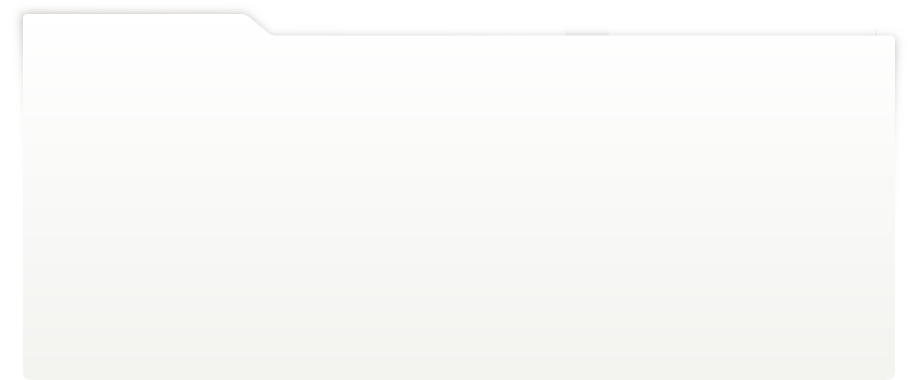
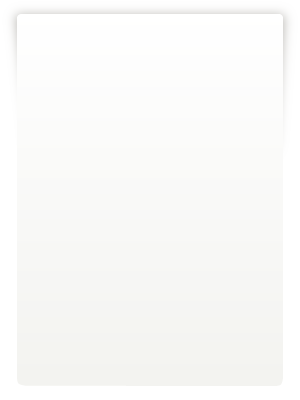
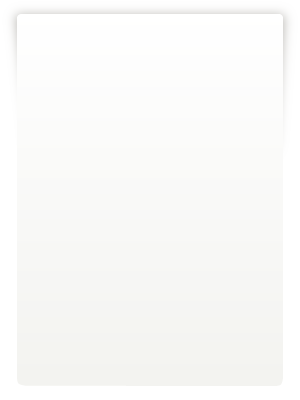
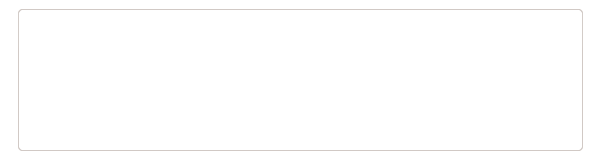
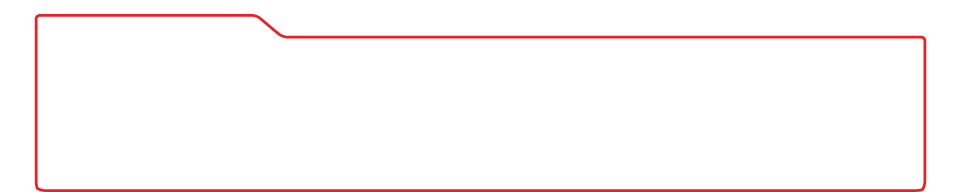
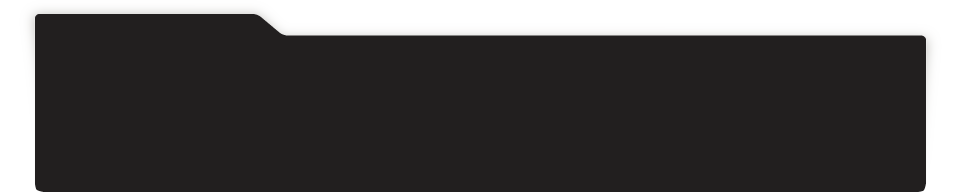
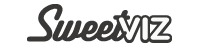
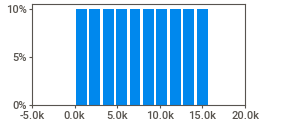
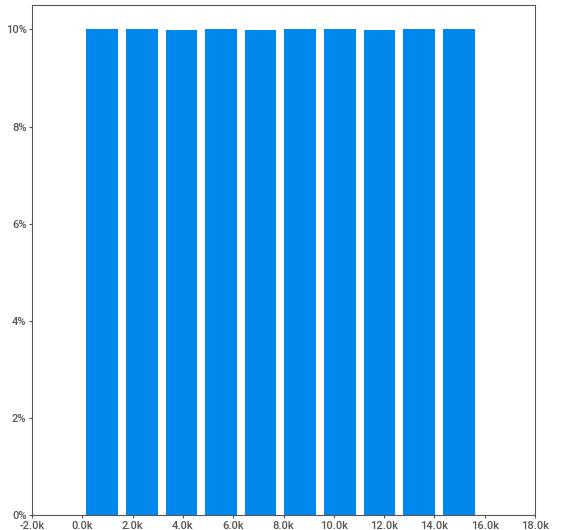
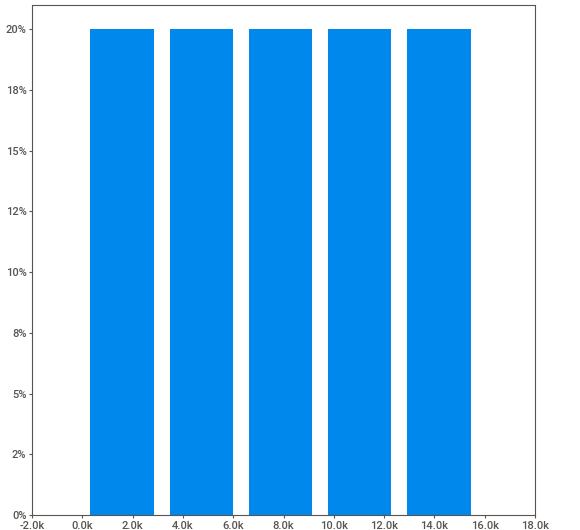
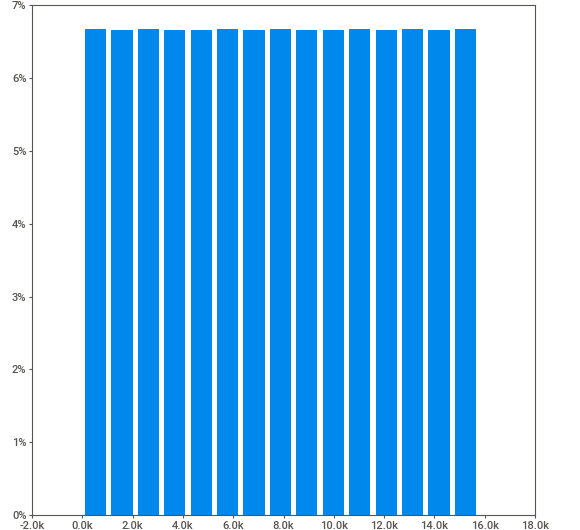
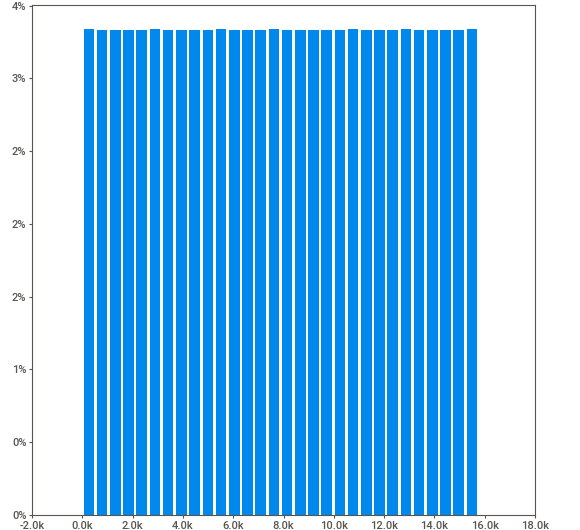
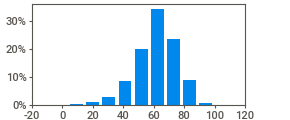
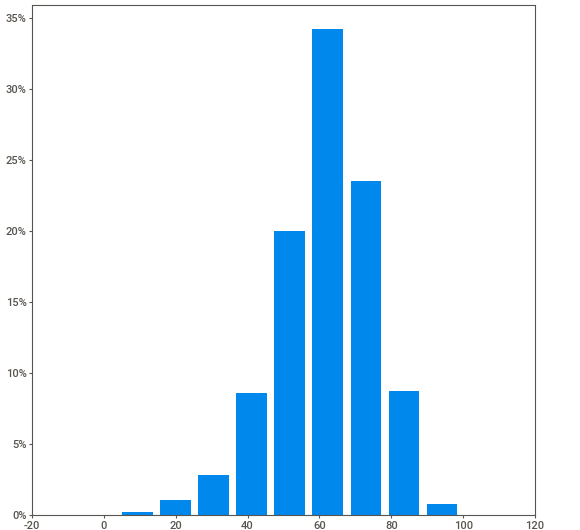
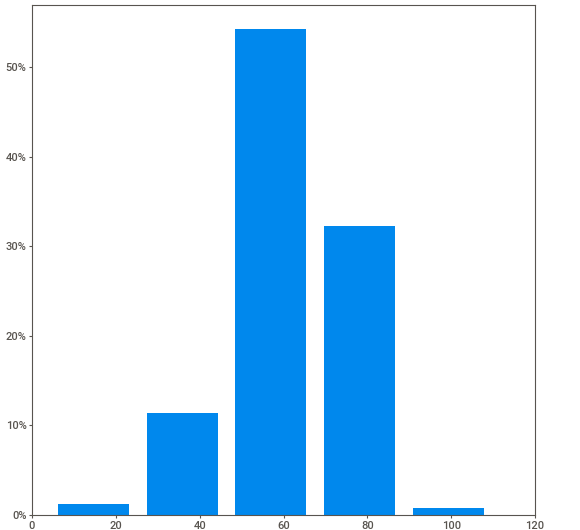
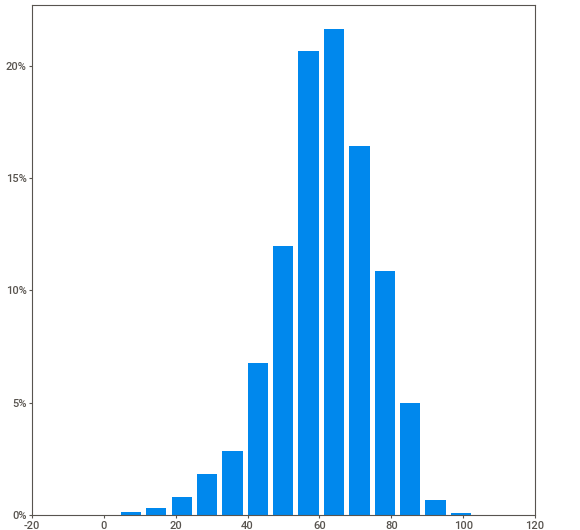
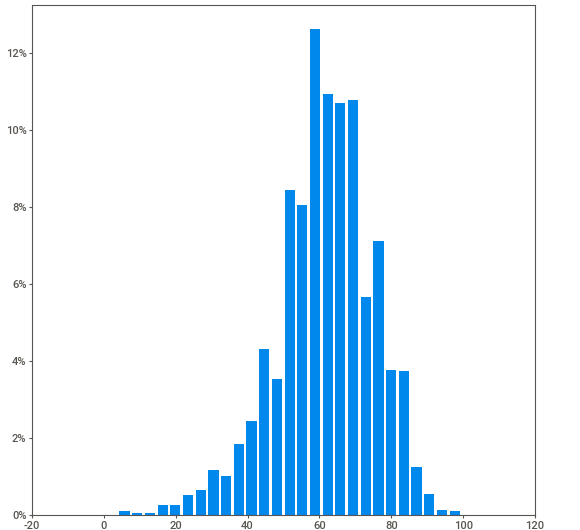
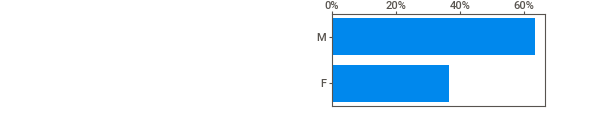
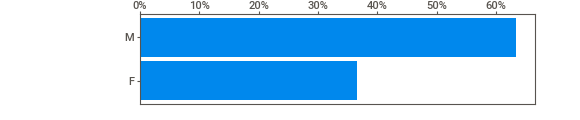
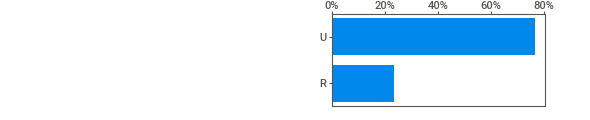
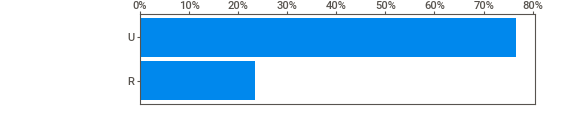
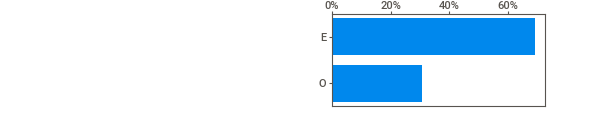
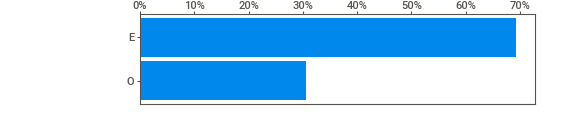
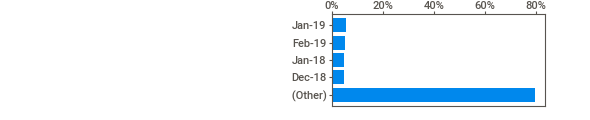
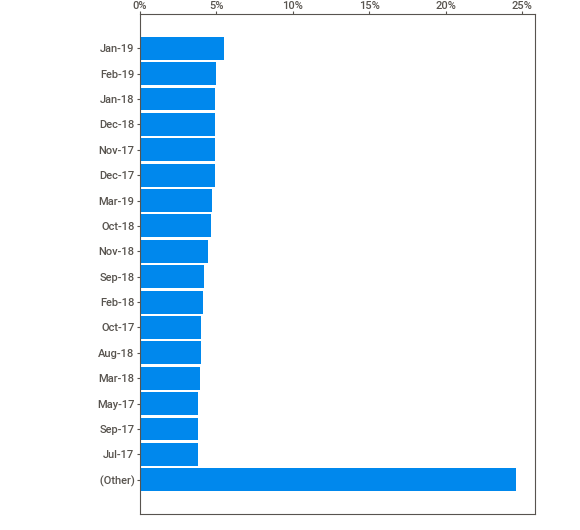
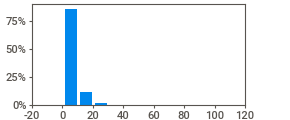
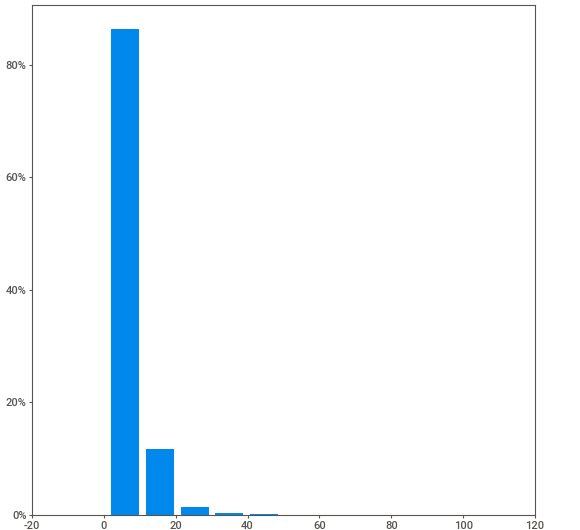
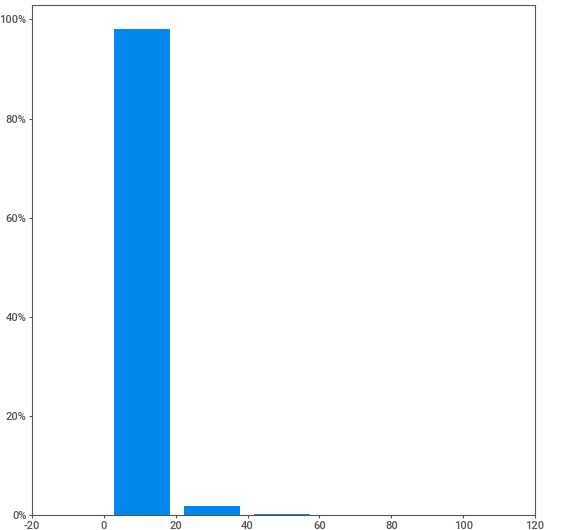
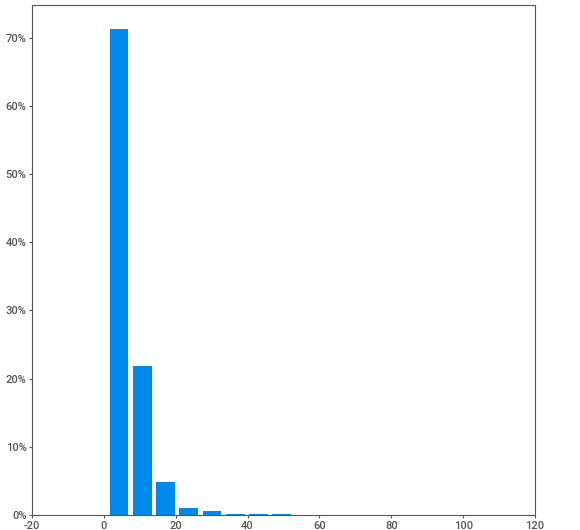
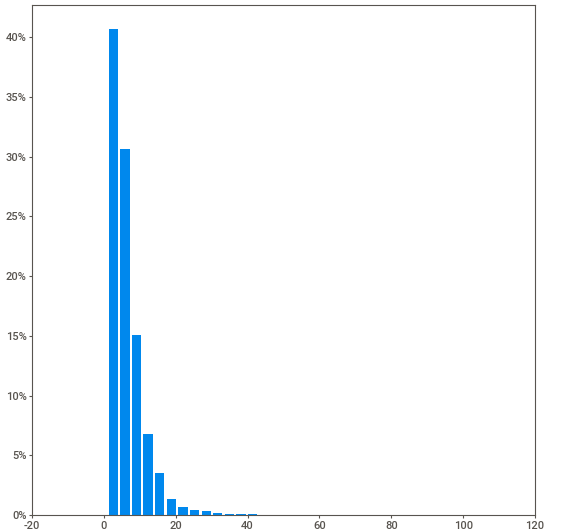
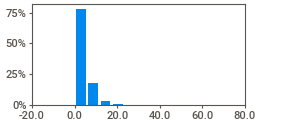
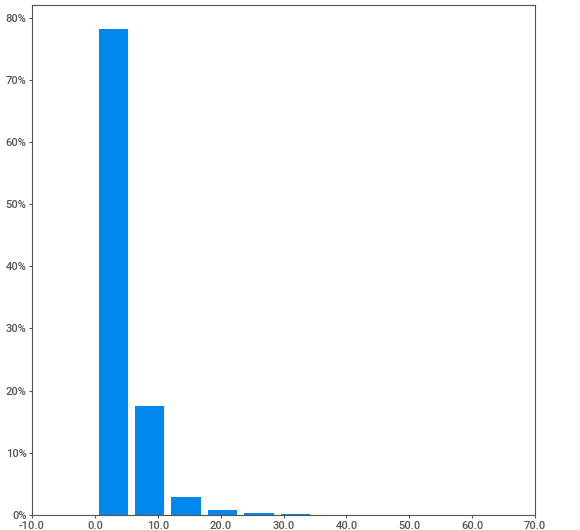
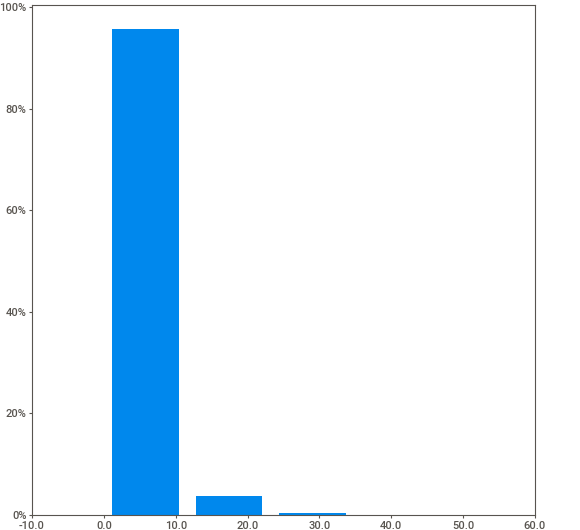
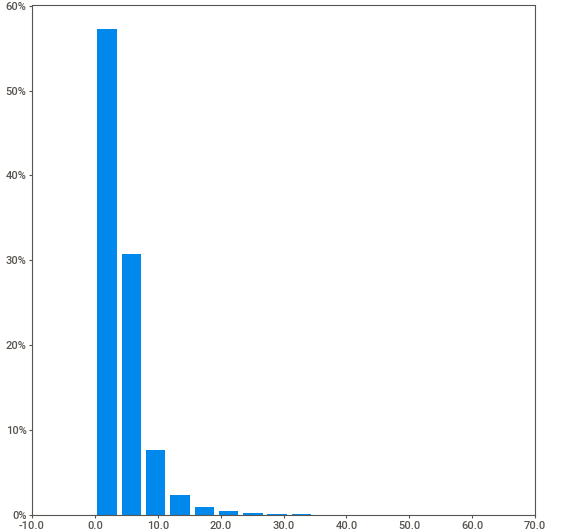
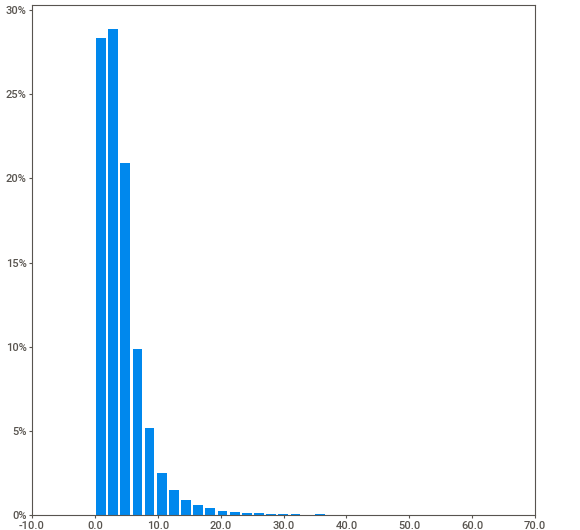
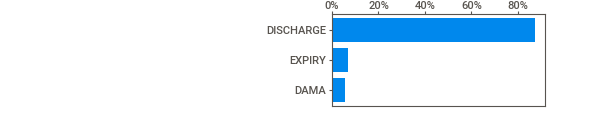
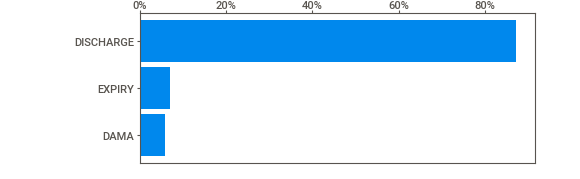
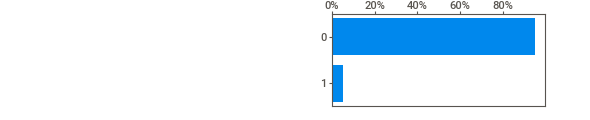
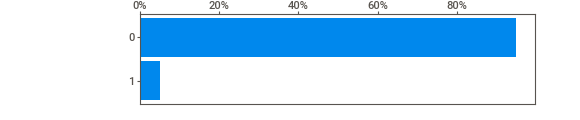
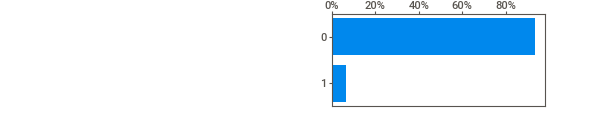
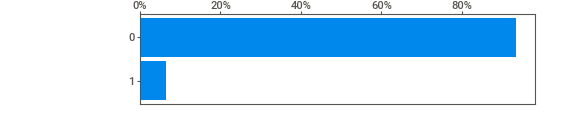
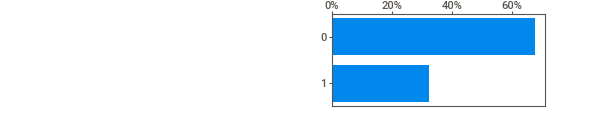
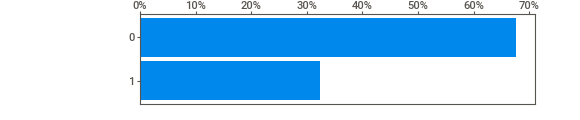
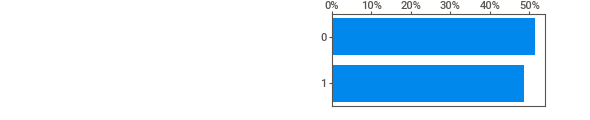
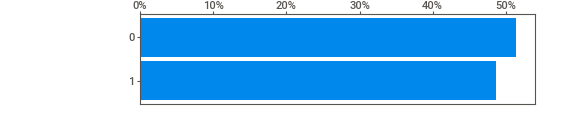
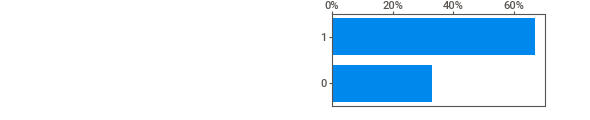
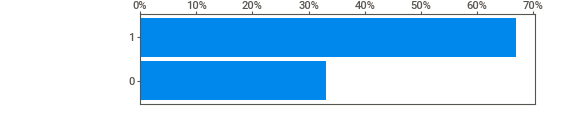
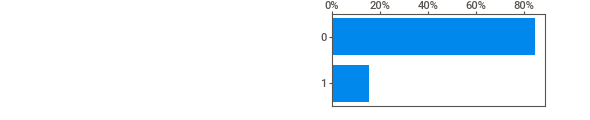
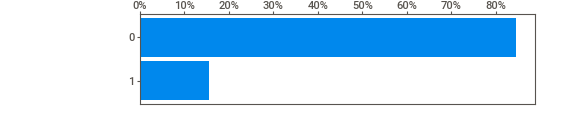
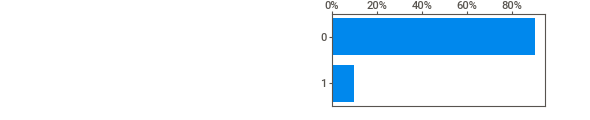
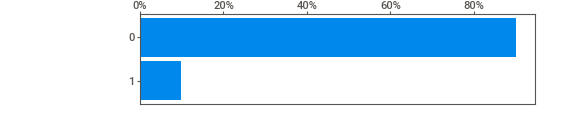
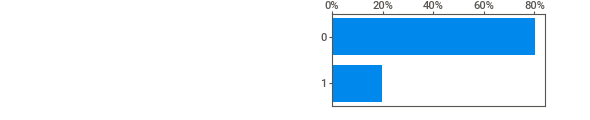
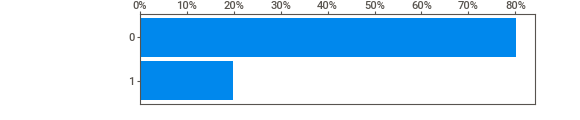
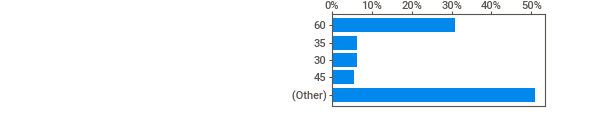
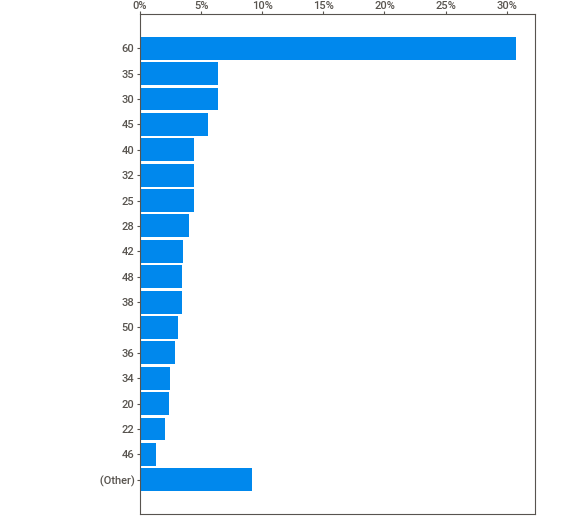
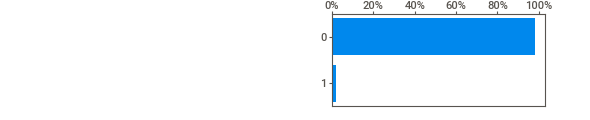
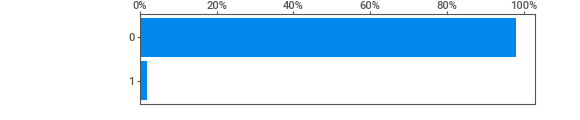
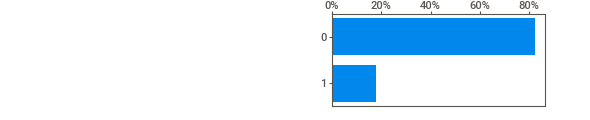
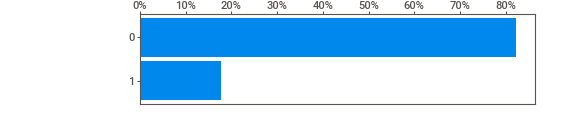
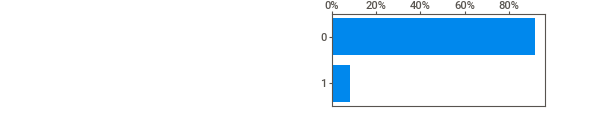
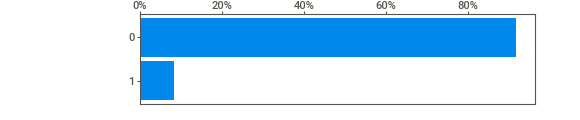
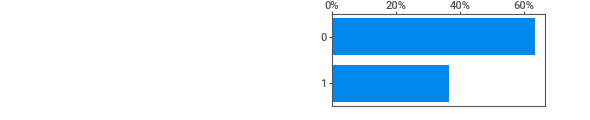
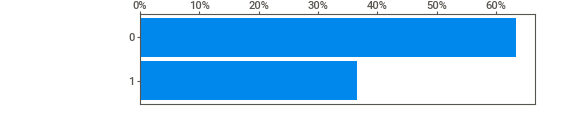
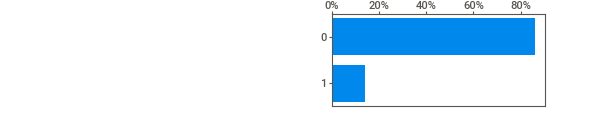
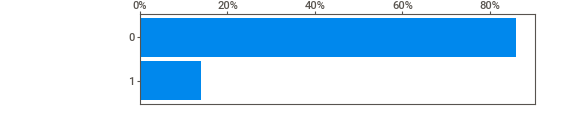
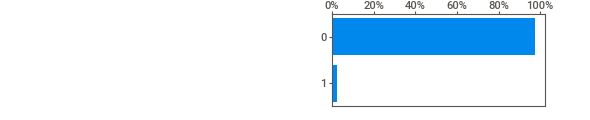
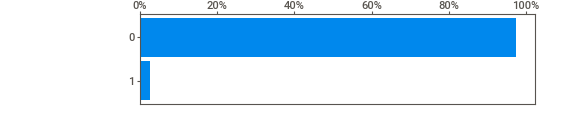
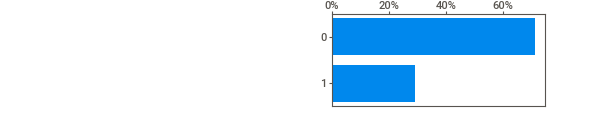
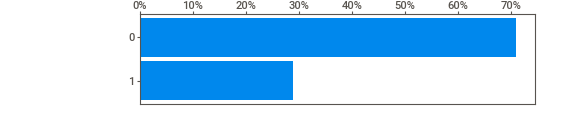
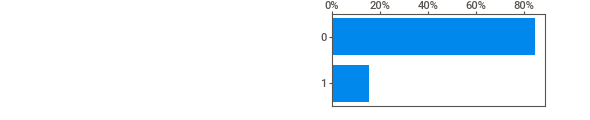
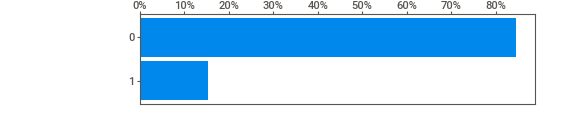
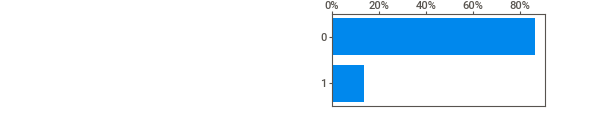
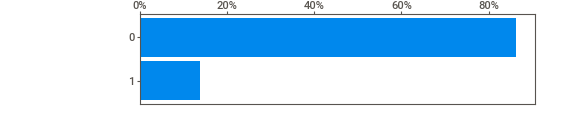
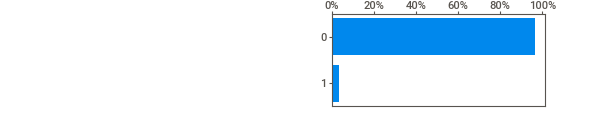
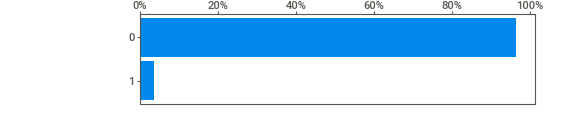
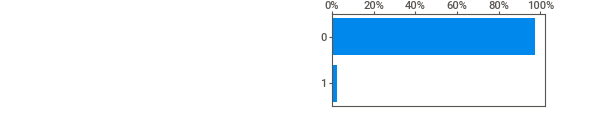
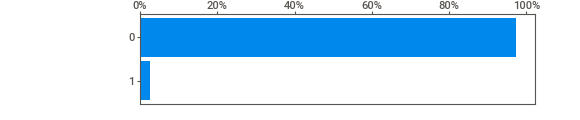
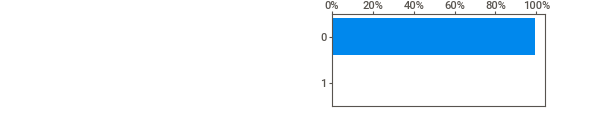
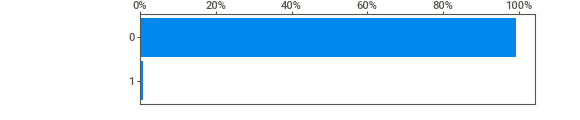
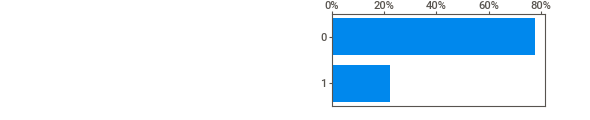
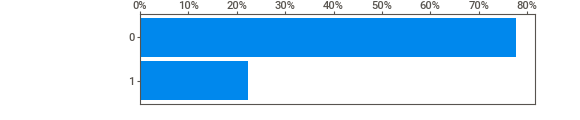
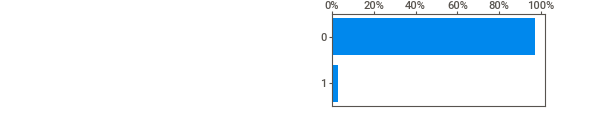
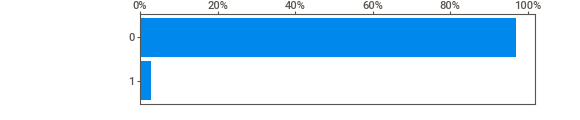
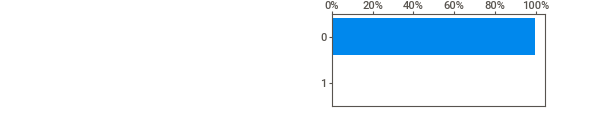
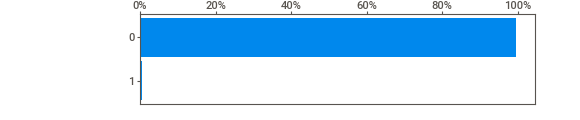
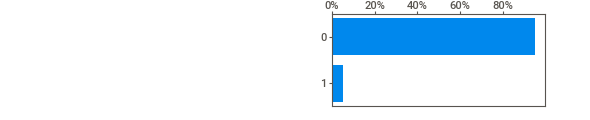
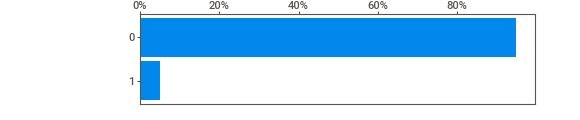
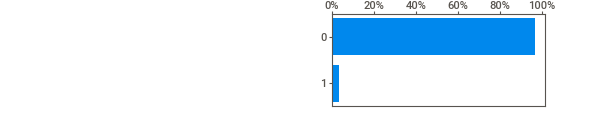
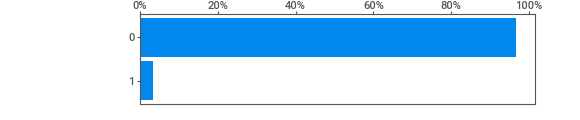
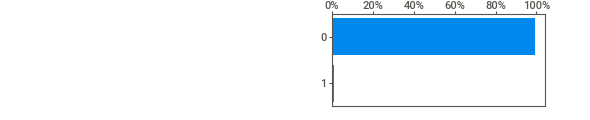
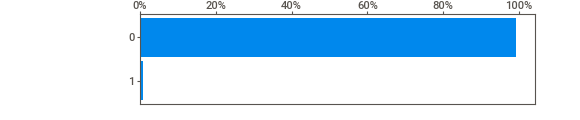
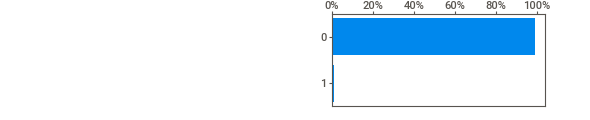
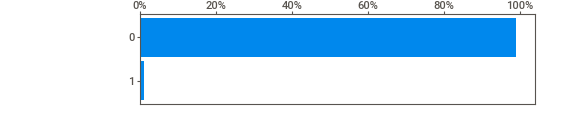
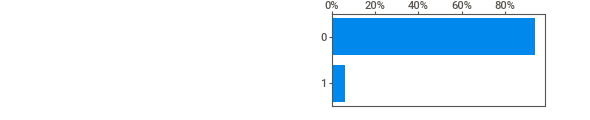
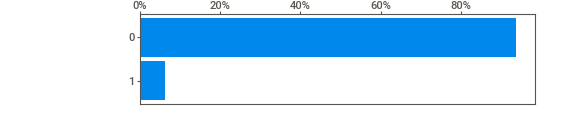
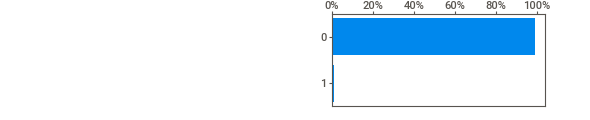
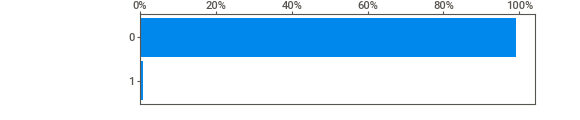
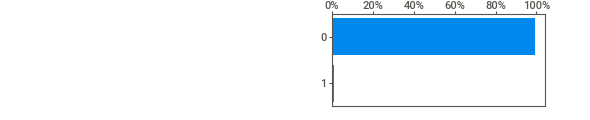
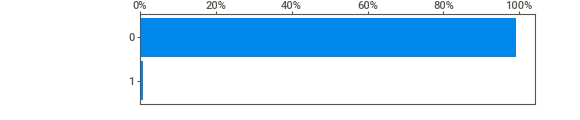
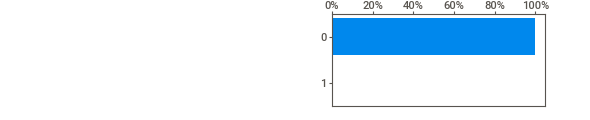
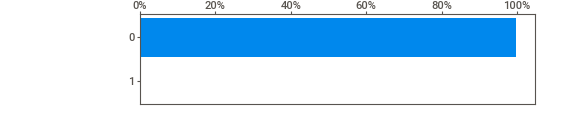
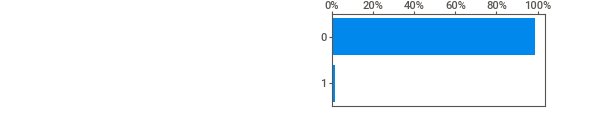
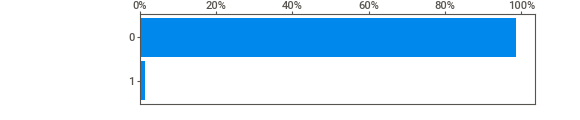
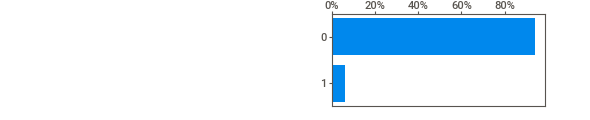
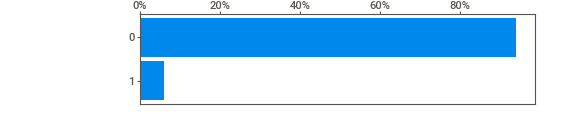
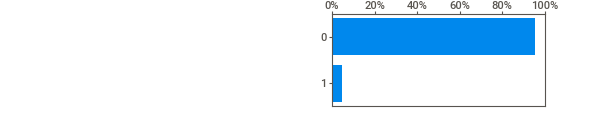
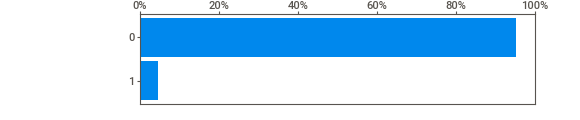
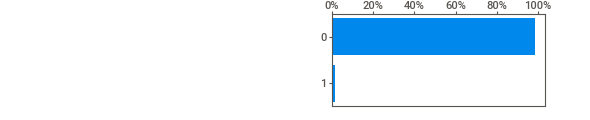
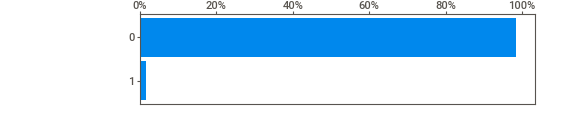
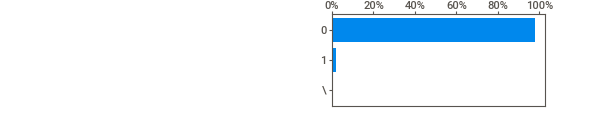
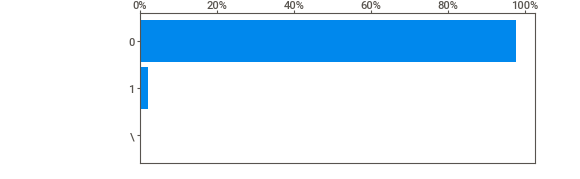
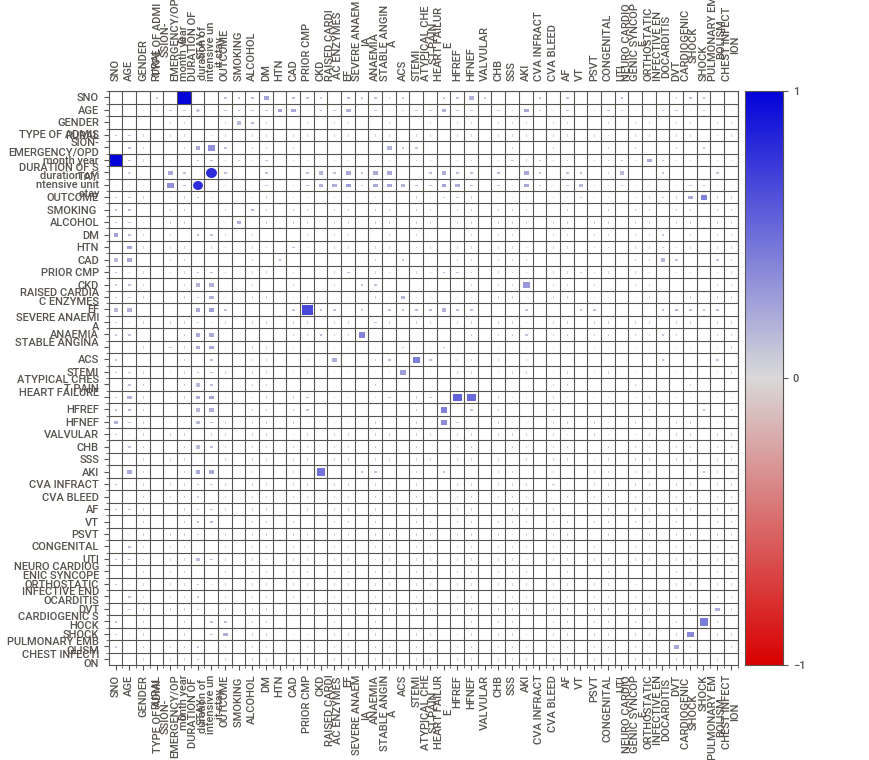
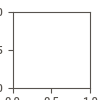

In [11]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_notebook()

In [12]:
# !pip install autoviz

In [13]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# df = AV.AutoViz('./WQD7003-Data-Analytics/HDHI_Admission_data/HDHI_Admission_data.csv', verbose=0)
# # df = AV.AutoViz(data, verbose=1)



---

##**3. Data Cleaning**

Based on the Data Understanding result above, data cleaning and preprocessing to be performed in order to resolve issues pertaining irrelevant information, errors, missing values, and etc as well as performing data transformation to ensure that the data is suitable for further analysis.

Steps for data cleaning executed are as below: \
1. Use Emergency only
2. Check missing values
3. Fill 0 as default for disease columns
4. Remove unnecessary columns
  - SNO
  - MRD No.
  - TYPE OF ADMISSION-EMERGENCY/OPD
  - Date
5. Rename attribute 'SMOKING ' TO 'SMOKING'
6. GLUCOSE, UREA, PLATELETS, TLC, HB, EF, CREATININE, BNP, data need conversion to standard unit or simply remove the outlier
7. Replace / to 0 in CHEST INFECTION column
8. Label encoding for machine learning (GENDER, RURAL, OUTCOME*)
9. Apply normalization on numerical attributes, GLUCOSE, UREA, PLATELETS, TLC HB, EF, CREATININE, BNP
10. Split the data into training and testing set

In [14]:
# Get Emergency only
data = data[data["TYPE OF ADMISSION-EMERGENCY/OPD"] == 'E']

# Fix the naming format problem
data.rename(columns = {'SMOKING ':'SMOKING'}, inplace = True)  

# Drop unnecessary columns
data.drop(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'duration of intensive unit stay'], axis = 1, inplace = True)

In [15]:
# Check empty value in dataset
def print_empty_value(data, isna_only=False):
  df = pd.DataFrame(columns = ['Column_Names', "Num_Of_Empty_Value"])

  for i in data:
    # sum(pd.isna(data['BNP'])) + sum(data[data['BNP'] == ''].index)
    number_of_empty_value = sum(pd.isna(data[i]))

    if not isna_only:
       number_of_empty_value += len(data[data[i] == 'EMPTY'])

    df = df.append({'Column_Names': i, 'Num_Of_Empty_Value': number_of_empty_value}, ignore_index=True)

  result = df[df['Num_Of_Empty_Value'] != 0]

  if(len(result) == 0):
    print("No empty value")
  else:
    print(result)
  
  return result

missing_value = print_empty_value(data)

   Column_Names Num_Of_Empty_Value
12           HB                234
13          TLC                261
14    PLATELETS                262
15      GLUCOSE                763
16         UREA                214
17   CREATININE                217
18          BNP               5541
20           EF                754


In [16]:
# Replace value with 'EMPTY' with none
data.replace('EMPTY', np.nan, inplace=True)
missing_value = print_empty_value(data, True)

   Column_Names Num_Of_Empty_Value
12           HB                234
13          TLC                261
14    PLATELETS                262
15      GLUCOSE                763
16         UREA                214
17   CREATININE                217
18          BNP               5541
20           EF                754


In [17]:
# Check value count in every missing value column whether is number
for i in range(len(missing_value)):
  value_counts = data[missing_value.iloc[i, 0]].value_counts()

  print([row for row in value_counts.index if not row.replace('.', '', 1).isdigit()])

[]
[]
[]
[]
[]
[]
[]
[]


In [18]:
# Run only once, if run when the label encoding have been applied to dataset, the inverse encoding may fail
from sklearn.preprocessing import LabelEncoder

gender_label_encoder = LabelEncoder()
rural_label_encoder = LabelEncoder()
outcome_label_encoder = LabelEncoder()

gender_label_encoder.fit(data['GENDER'])
rural_label_encoder.fit(data['RURAL'])
outcome_label_encoder.fit(data['OUTCOME'])

print(list(gender_label_encoder.classes_))
print(list(rural_label_encoder.classes_))
print(list(outcome_label_encoder.classes_))

['F', 'M']
['R', 'U']
['DAMA', 'DISCHARGE', 'EXPIRY']


In [19]:
# Label encoding in categorical variable, GENDER, RURAL, OUTCOME
data['GENDER'] = gender_label_encoder.transform(data['GENDER'])
data['RURAL'] = rural_label_encoder.transform(data['RURAL'])
data['OUTCOME'] = outcome_label_encoder.transform(data['OUTCOME'])

In [20]:
# Impute data with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer()

After_imputation = imputer.fit_transform(data)
imputed_data = pd.DataFrame(After_imputation, index=data.index, columns=data.columns)

print_empty_value(imputed_data)

No empty value


Empty DataFrame
Columns: [Column_Names, Num_Of_Empty_Value]
Index: []

In [21]:
# Code example to inverse the encoding
# data['GENDER'] = gender_label_encoder.inverse_transform(data['GENDER'])
# data['RURAL'] = rural_label_encoder.inverse_transform(data['RURAL'])
# data['OUTCOME'] = outcome_label_encoder.inverse_transform(data['OUTCOME'])
data

AGE  GENDER  RURAL  DURATION OF STAY  OUTCOME  SMOKING  ALCOHOL  DM  \
0       81       1      0                 3        1        0        0   1   
1       65       1      0                 5        1        0        1   0   
2       53       1      1                 3        1        0        0   1   
3       67       0      1                 8        1        0        0   0   
4       60       0      1                23        1        0        0   0   
...    ...     ...    ...               ...      ...      ...      ...  ..   
15748   74       0      1                 2        1        0        0   0   
15749   52       0      1                 5        1        0        0   1   
15751   60       0      1                 9        1        0        0   0   
15753   50       1      0                 2        2        0        0   1   
15754   82       1      1                10        1        0        0   0   

       HTN  CAD  ...  CONGENITAL  UTI NEURO CARDIOGENIC SYNCOPE ORTHOSTATIC  \
0        0    0  ...           0    0                         0           0   
1        1    1  ...           0    0                         0           0   
2        0    1  ...           0    0                         0           0   
3        1    1  ...           0    0                         0           0   
4        1    0  ...           0    0                         0           0   
...    ...  ...  ...         ...  ...                       ...         ...   
15748    1    1  ...           0    0                         0           0   
15749    0    1  ...           0    0                         0           0   
15751    0    1  ...           0    0                         0           0   
15753    1    0  ...           0    0                         0           0   
15754    1    1  ...           0    0                         0           0   

      INFECTIVE ENDOCARDITIS DVT CARDIOGENIC SHOCK SHOCK PULMONARY EMBOLISM  \
0                          0   0                 0     0                  0   
1                          0   0                 0     0                  0   
2                          0   0                 0     0                  0   
3                          0   0                 0     0                  0   
4                          0   0                 0     0                  0   
...                      ...  ..               ...   ...                ...   
15748                      0   0                 0     0                  0   
15749                      0   0                 0     0                  0   
15751                      0   0                 0     0                  0   
15753                      0   0                 0     0                  0   
15754                      0   0                 0     0                  0   

       CHEST INFECTION  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
15748                0  
15749                0  
15751                0  
15753                0  
15754                0  

[10924 rows x 49 columns]

In [22]:
imputed_data.head()

AGE  GENDER  RURAL  DURATION OF STAY  OUTCOME  SMOKING  ALCOHOL   DM  HTN  \
0  81.0     1.0    0.0               3.0      1.0      0.0      0.0  1.0  0.0   
1  65.0     1.0    0.0               5.0      1.0      0.0      1.0  0.0  1.0   
2  53.0     1.0    1.0               3.0      1.0      0.0      0.0  1.0  0.0   
3  67.0     0.0    1.0               8.0      1.0      0.0      0.0  0.0  1.0   
4  60.0     0.0    1.0              23.0      1.0      0.0      0.0  0.0  1.0   

   CAD  ...  CONGENITAL  UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0  0.0  ...         0.0  0.0                        0.0          0.0   
1  1.0  ...         0.0  0.0                        0.0          0.0   
2  1.0  ...         0.0  0.0                        0.0          0.0   
3  1.0  ...         0.0  0.0                        0.0          0.0   
4  0.0  ...         0.0  0.0                        0.0          0.0   

   INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  \
0                     0.0  0.0                0.0    0.0                 0.0   
1                     0.0  0.0                0.0    0.0                 0.0   
2                     0.0  0.0                0.0    0.0                 0.0   
3                     0.0  0.0                0.0    0.0                 0.0   
4                     0.0  0.0                0.0    0.0                 0.0   

   CHEST INFECTION  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 49 columns]

In [23]:
# Normalization goes here -- need more study to determine the normalization technique
# For now, MinMaxScaler of sklearn is used
from sklearn.preprocessing import normalize, MinMaxScaler

# normalized_arr = normalize(imputed_data[['GLUCOSE']])
# normalized_arr

scaler = MinMaxScaler()
glucose = scaler.fit_transform(imputed_data[['GLUCOSE']])
imputed_data['GLUCOSE'] = glucose

UREA = scaler.fit_transform(imputed_data[['UREA']])
imputed_data['UREA'] = UREA

PLATELETS = scaler.fit_transform(imputed_data[['PLATELETS']])
imputed_data['PLATELETS'] = PLATELETS

TLC = scaler.fit_transform(imputed_data[['TLC']])
imputed_data['TLC'] = TLC

HB = scaler.fit_transform(imputed_data[['HB']])
imputed_data['HB'] = HB

EF = scaler.fit_transform(imputed_data[['EF']])
imputed_data['EF'] = EF

CREATININE = scaler.fit_transform(imputed_data[['CREATININE']])
imputed_data['CREATININE'] = CREATININE

BNP = scaler.fit_transform(imputed_data[['BNP']])
imputed_data['BNP'] = BNP

imputed_data[["GLUCOSE", "UREA", "PLATELETS", "TLC", "HB", "EF", "CREATININE", "BNP"]]

GLUCOSE      UREA  PLATELETS       TLC        HB        EF  \
0      0.097549  0.068499   0.285484  0.050972  0.342105  0.456522   
1      0.137163  0.036169   0.125948  0.028353  0.563158  0.608696   
2      0.230007  0.187715   0.278695  0.046512  0.400000  0.847826   
3      0.159445  0.054354   0.242206  0.031220  0.515789  0.608696   
4      0.176776  0.110932   0.021571  0.028672  0.557895  0.043478   
...         ...       ...        ...       ...       ...       ...   
15748  0.160683  0.036573   0.316033  0.025677  0.508421  1.000000   
15749  0.116118  0.054354   0.160741  0.023256  0.489474  1.000000   
15751  0.273335  0.036169   0.052969  0.079325  0.268421  0.521739   
15753  0.305521  0.189735   0.120008  0.049379  0.536842  0.304348   
15754  0.258480  0.135179   0.315185  0.036954  0.331579  0.391304   

       CREATININE       BNP  
0        0.054098  0.375500  
1        0.054098  0.037390  
2        0.144801  0.041233  
3        0.034661  0.076301  
4        0.076774  0.367494  
...           ...       ...  
15748    0.033366  0.014412  
15749    0.054098  0.057126  
15751    0.028183  0.233387  
15753    0.112407  0.040432  
15754    0.118886  0.223379  

[10924 rows x 8 columns]

###**Exploratory Data Analysis (EDA)**
##### An EDA is performed in order to assess the trend of admitted patients occupied during emergency situations and to identify any patterns that may emerge

##### **1. Trending of emergency patients by Age Group**


*   Maximum duration of stays for an emergency patient stay in the hospital
*   Average duration of stays for an emergency patient stay in the hospital











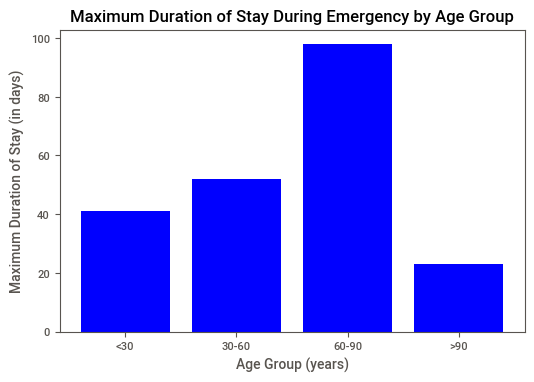

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Divide the ages into bins and group the data by bin
data['age_bin'] = pd.cut(data['AGE'], bins=[0, 30, 60, 90, 120], labels=['<30', '30-60', '60-90', '>90'])
age_groups = data.groupby('age_bin')['DURATION OF STAY'].max()


# Set the x-axis to the age bin labels and the y-axis to the maximum duration of stay
x = ['<30', '30-60', '60-90', '>90']
y = age_groups

# Create a bar chart
plt.bar(x, y, color = 'blue')

# Add a title and labels for the x and y axes
plt.title('Maximum Duration of Stay During Emergency by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Maximum Duration of Stay (in days)')

# Show the plot
plt.show()


###### From the bar chart above, it can be concluded that **maximum duration of stay for emergency patients in all age group is more than 20 days** with **maximum stay of more than 90 days (3 months)** for **patients with age between 60 to 90 years**

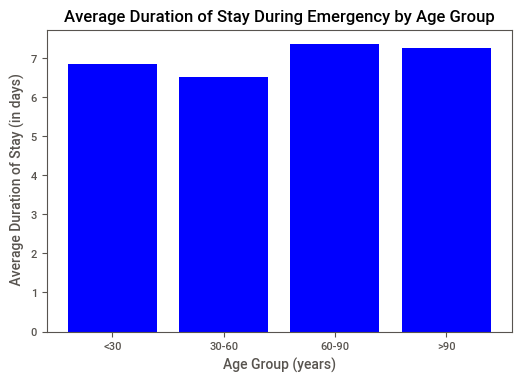

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Divide the ages into bins and group the data by bin
age_groups.mean = data.groupby('age_bin')['DURATION OF STAY'].mean()


# Set the x-axis to the age bin labels and the y-axis to the average duration of stay
x = ['<30', '30-60', '60-90', '>90']
y = age_groups.mean

# Create a bar chart
plt.bar(x, y, color = 'blue')

# Add a title and labels for the x and y axes
plt.title('Average Duration of Stay During Emergency by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel(' Average Duration of Stay (in days)')

# Show the plot
plt.show()

###### It can be observed that **average duration of stay of the emergency patients for all age group** is approximately **7 days**

##### **2. Trending of emergency patients throughout the year 2017 to 2019**
*   Overall trending of emegency patient admitted from 2017-2019
*   Average duration stays for an emergency patient admitted from 2017-2019

In [26]:
df = pd.read_csv('./WQD7003-Data-Analytics/HDHI_Admission_data/HDHI_Admission_data.csv')
df.head()

SNO MRD No.     D.O.A      D.O.D  AGE GENDER RURAL  \
0    1  234735  4/1/2017   4/3/2017   81      M     R   
1    2  234696  4/1/2017   4/5/2017   65      M     R   
2    3  234882  4/1/2017   4/3/2017   53      M     U   
3    4  234635  4/1/2017   4/8/2017   67      F     U   
4    5  234486  4/1/2017  4/23/2017   60      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               E     Apr-17                 3  ...   
1                               E     Apr-17                 5  ...   
2                               E     Apr-17                 3  ...   
3                               E     Apr-17                 8  ...   
4                               E     Apr-17                23  ...   

   CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0   0                          0            0   
1           0   0                          0            0   
2           0   0                          0            0   
3           0   0                          0            0   
4           0   0                          0            0   

   INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  \
0                       0    0                  0      0                   0   
1                       0    0                  0      0                   0   
2                       0    0                  0      0                   0   
3                       0    0                  0      0                   0   
4                       0    0                  0      0                   0   

  CHEST INFECTION  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 56 columns]

In [27]:
# Get Emergency only
df1 = df[df["TYPE OF ADMISSION-EMERGENCY/OPD"] == 'E']
df1.head()

SNO MRD No.     D.O.A      D.O.D  AGE GENDER RURAL  \
0    1  234735  4/1/2017   4/3/2017   81      M     R   
1    2  234696  4/1/2017   4/5/2017   65      M     R   
2    3  234882  4/1/2017   4/3/2017   53      M     U   
3    4  234635  4/1/2017   4/8/2017   67      F     U   
4    5  234486  4/1/2017  4/23/2017   60      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               E     Apr-17                 3  ...   
1                               E     Apr-17                 5  ...   
2                               E     Apr-17                 3  ...   
3                               E     Apr-17                 8  ...   
4                               E     Apr-17                23  ...   

   CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0   0                          0            0   
1           0   0                          0            0   
2           0   0                          0            0   
3           0   0                          0            0   
4           0   0                          0            0   

   INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  \
0                       0    0                  0      0                   0   
1                       0    0                  0      0                   0   
2                       0    0                  0      0                   0   
3                       0    0                  0      0                   0   
4                       0    0                  0      0                   0   

  CHEST INFECTION  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 56 columns]

C:\Users\lalala\AppData\Local\Temp/ipykernel_11284/2989899079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month year'] = pd.to_datetime(df['month year'], format='%b-%y')


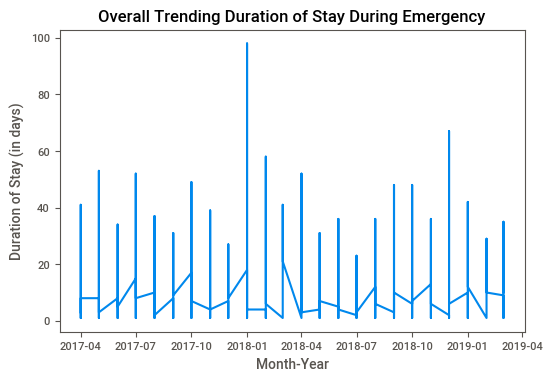

In [28]:
# Plot graph to observe the trending of total duration of patient stays during emergency
import matplotlib.pyplot as plt
import pandas as pd

# Extract the 'month year' column as a datetime object
df1['month year'] = pd.to_datetime(df['month year'], format='%b-%y')


# Set the x-axis to the month/year labels and the y-axis to the average duration of stay
x = df1['month year']
y = df1['DURATION OF STAY']

# Create a line plot
plt.plot(x, y,)

# Add a title and labels for the x and y axes
plt.title('Overall Trending Duration of Stay During Emergency')
plt.xlabel('Month-Year')
plt.ylabel('Duration of Stay (in days)')

# Show the plot
plt.show()


C:\Users\lalala\AppData\Local\Temp/ipykernel_11284/1471109266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month year'] = pd.to_datetime(df['month year'], format='%b-%y')


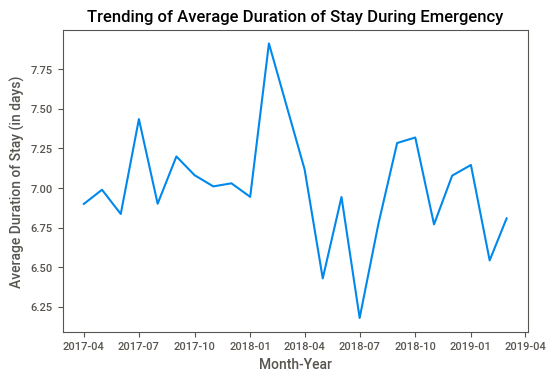

In [29]:
# Plot graph to observe the trending of average duration of patient stays during emergency

import matplotlib.pyplot as plt
import pandas as pd

# Extract the 'month year' column as a datetime object
df1['month year'] = pd.to_datetime(df['month year'], format='%b-%y')

# Group the data by the 'month year' column and calculate the mean duration of stay for each month
groups = df1.groupby('month year')['DURATION OF STAY'].mean()

# Set the x-axis to the month/year labels and the y-axis to the average duration of stay
x = groups.index
y = groups.values

# Create a line plot
plt.plot(x, y)

# Add a title and labels for the x and y axes
plt.title('Trending of Average Duration of Stay During Emergency')
plt.xlabel('Month-Year')
plt.ylabel('Average Duration of Stay (in days)')

# Show the plot
plt.show()


##### **3. Assess duration of patients stays in hospital according to their symptoms/diagnoses**
###### 0 - no symptom/diagnose
###### 1 - have symptom/diagnose

In [30]:
data.columns

Index(['AGE', 'GENDER', 'RURAL', 'DURATION OF STAY', 'OUTCOME', 'SMOKING',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC',
       'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP',
       'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA',
       'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
       'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION', 'age_bin'],
      dtype='object')

In [31]:
col_viz = ['SMOKING','ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD',
       'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA',
       'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
       'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION']

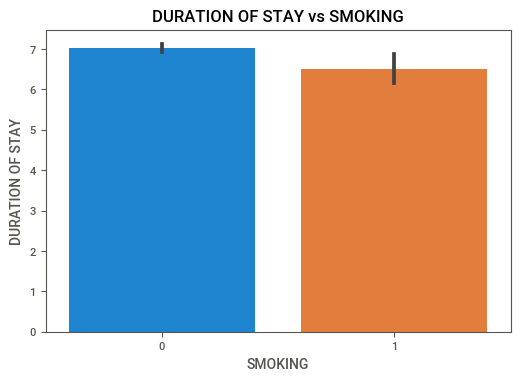

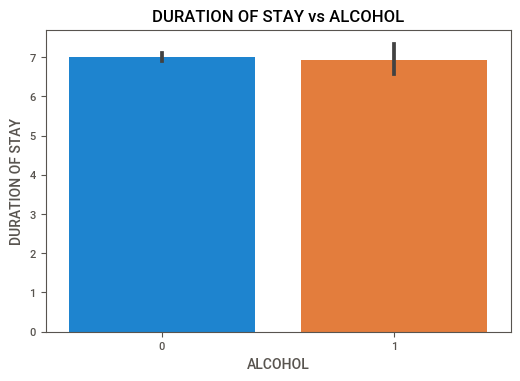

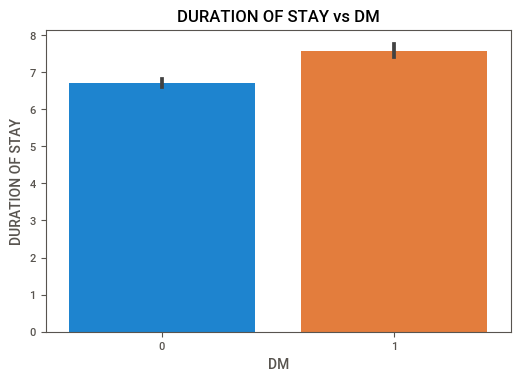

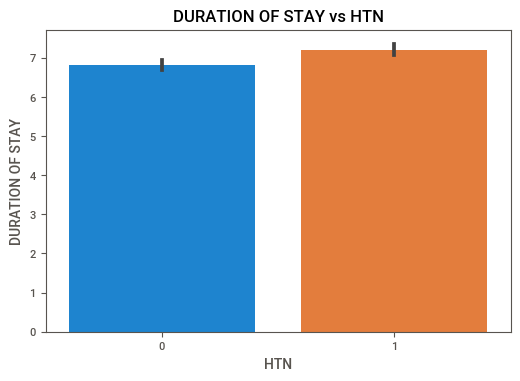

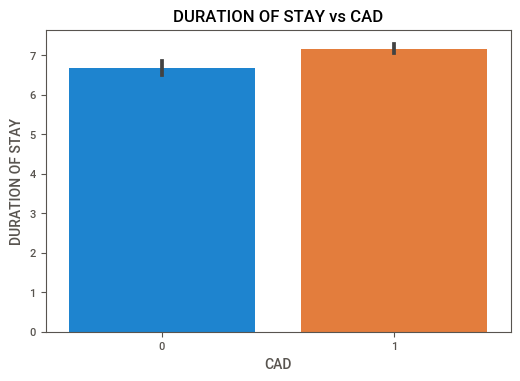

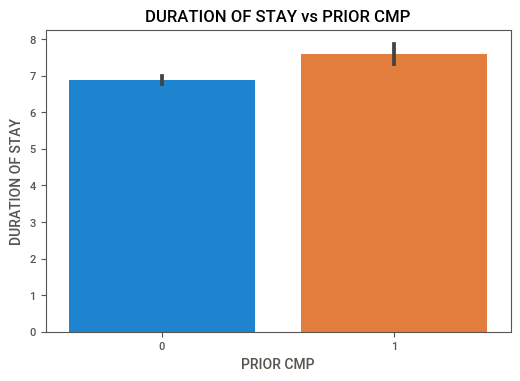

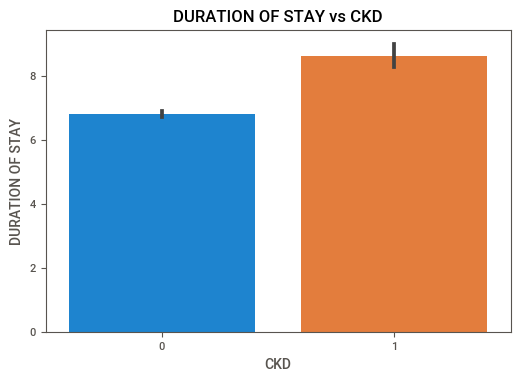

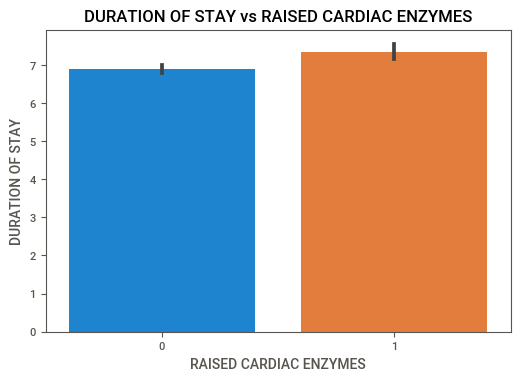

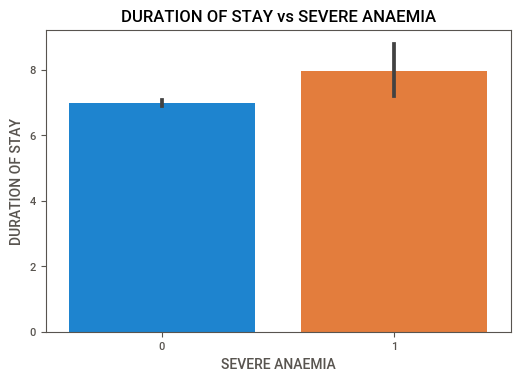

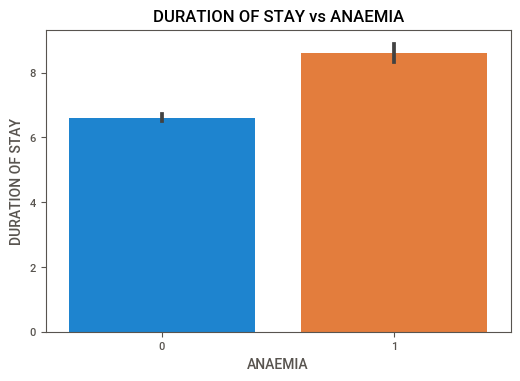

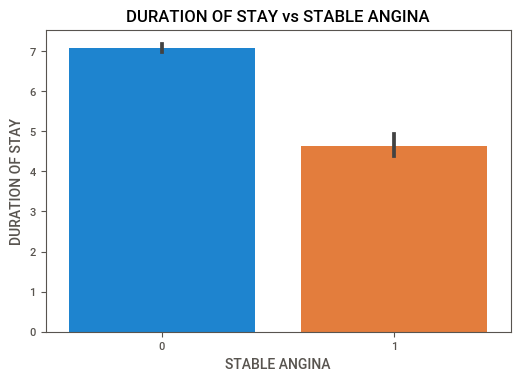

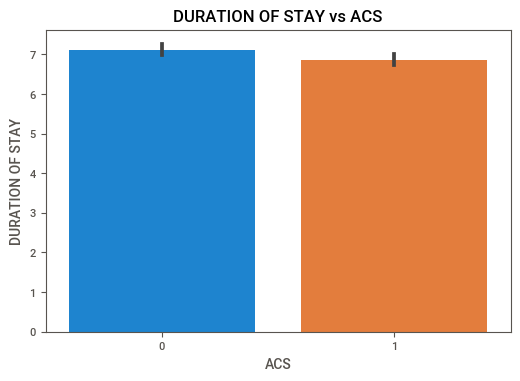

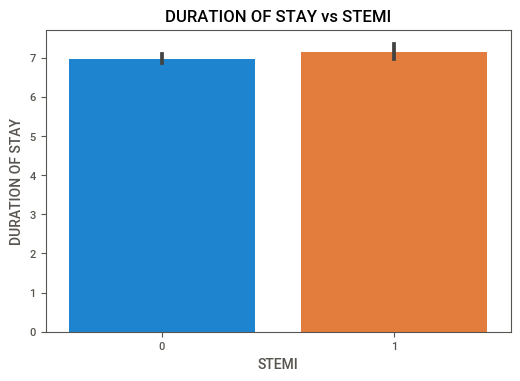

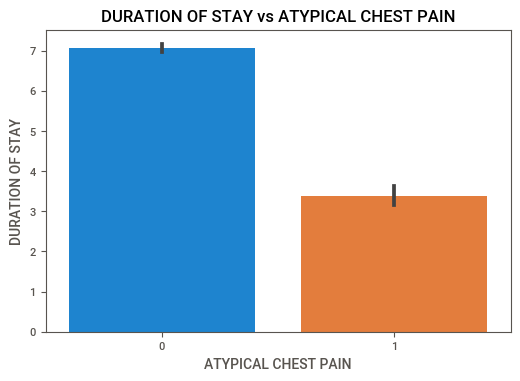

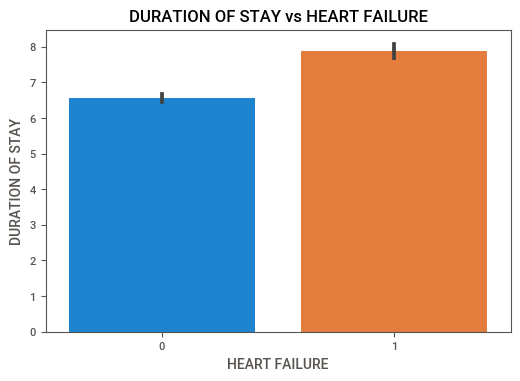

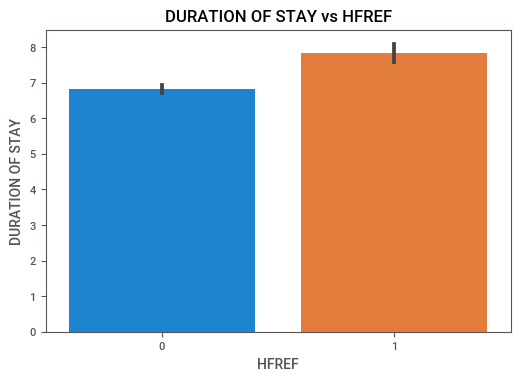

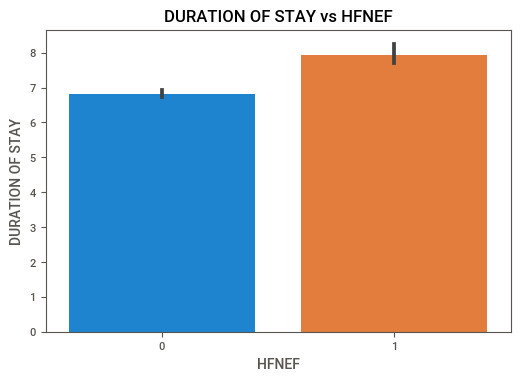

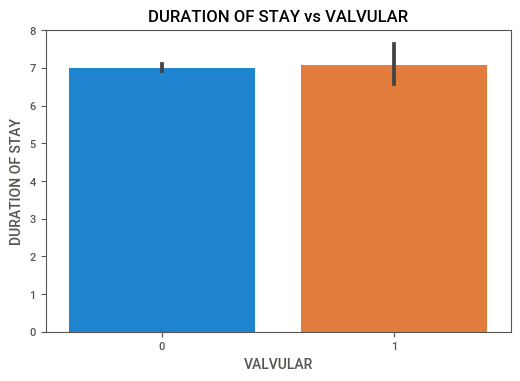

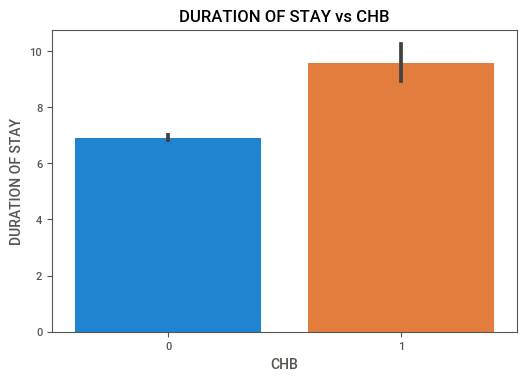

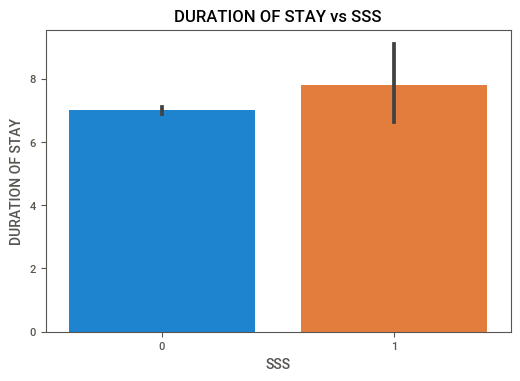

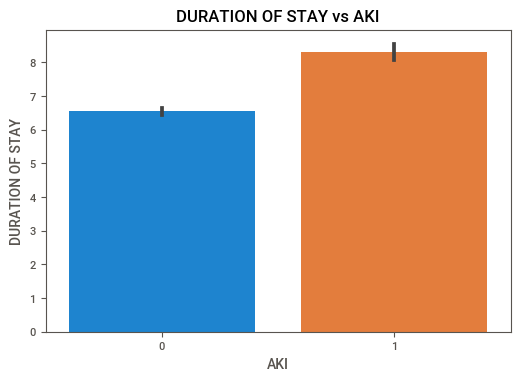

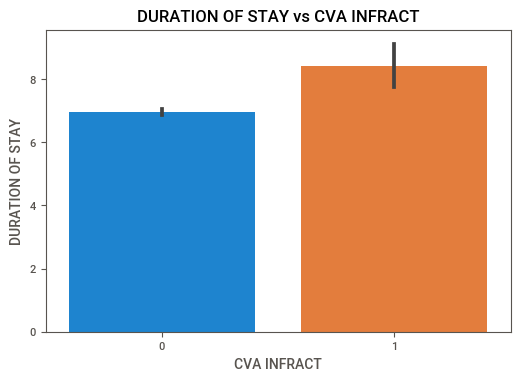

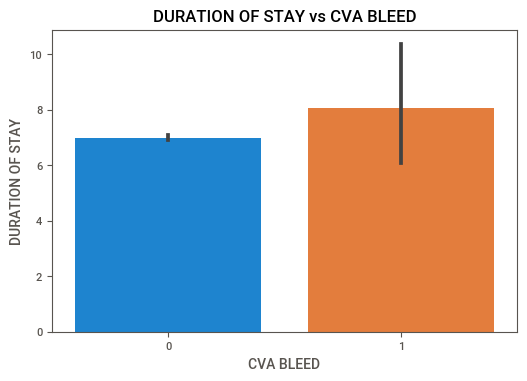

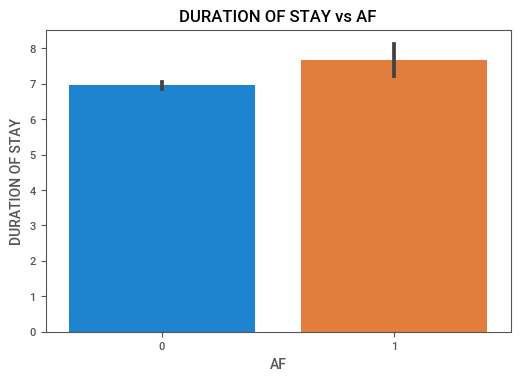

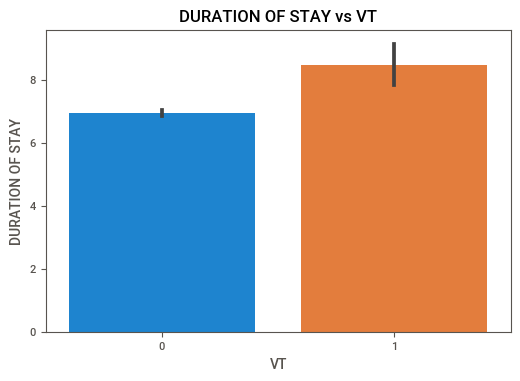

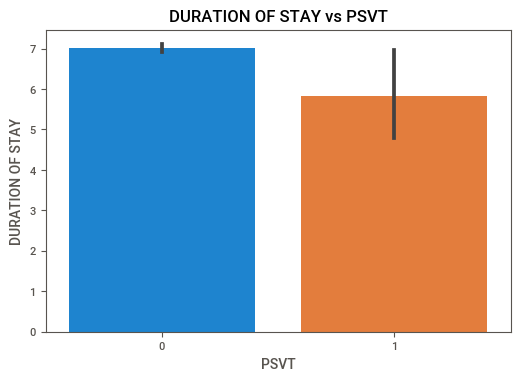

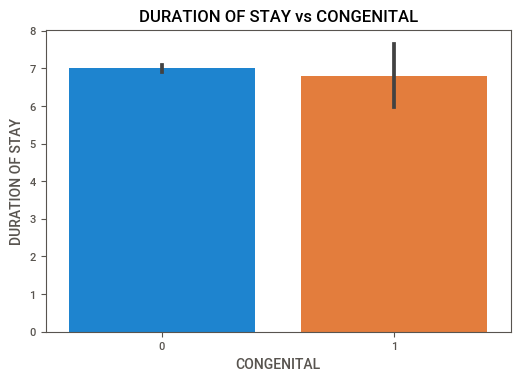

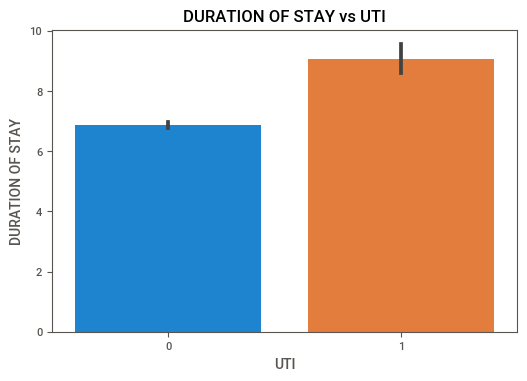

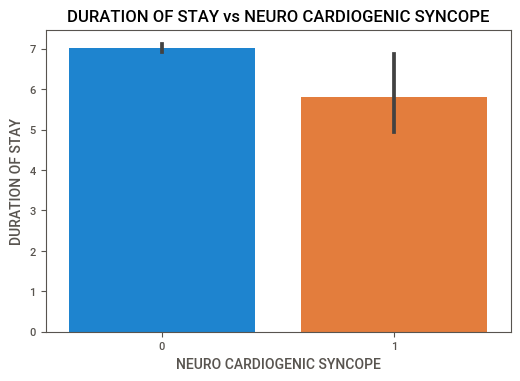

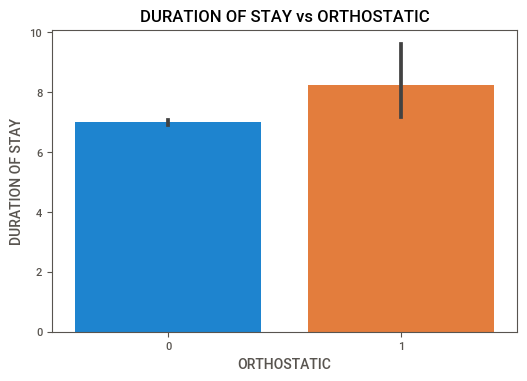

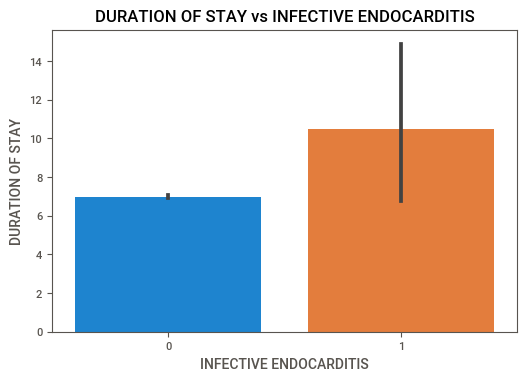

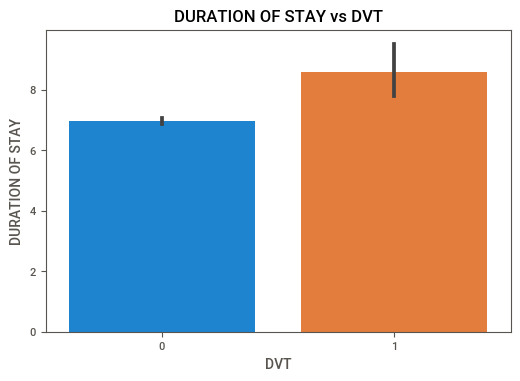

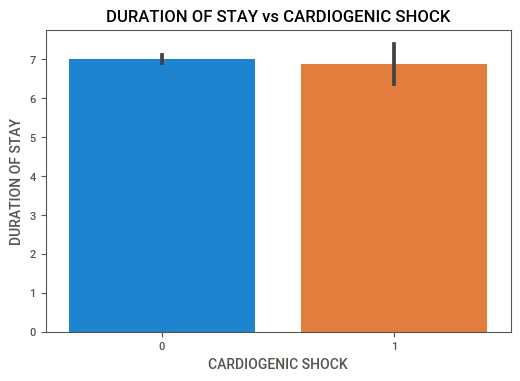

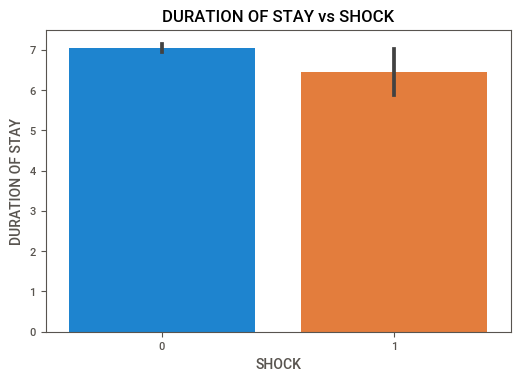

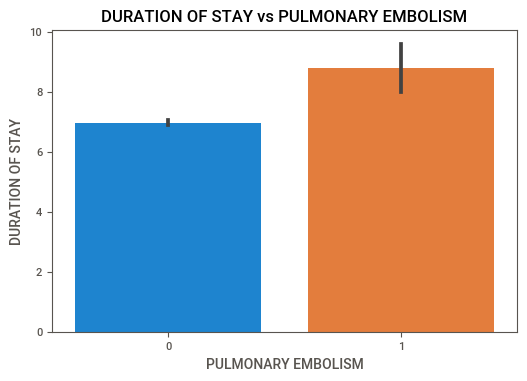

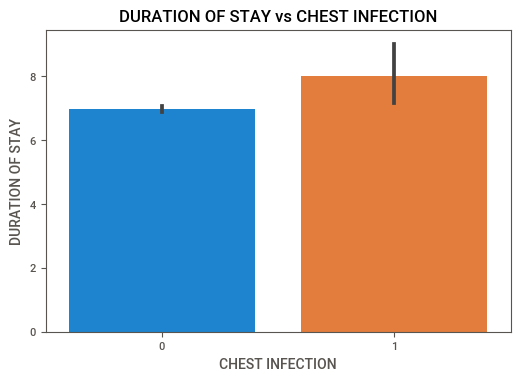

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in col_viz:
    plt.figure()
    sns.barplot(x=data[col], y=data['DURATION OF STAY'])
    
    # Add a title to the plot
    plt.title(f"DURATION OF STAY vs {col}")
    
    plt.show()

##### **4. Assess correlation of duration of stays of emergency patients based on their symptoms/ diagnoses**

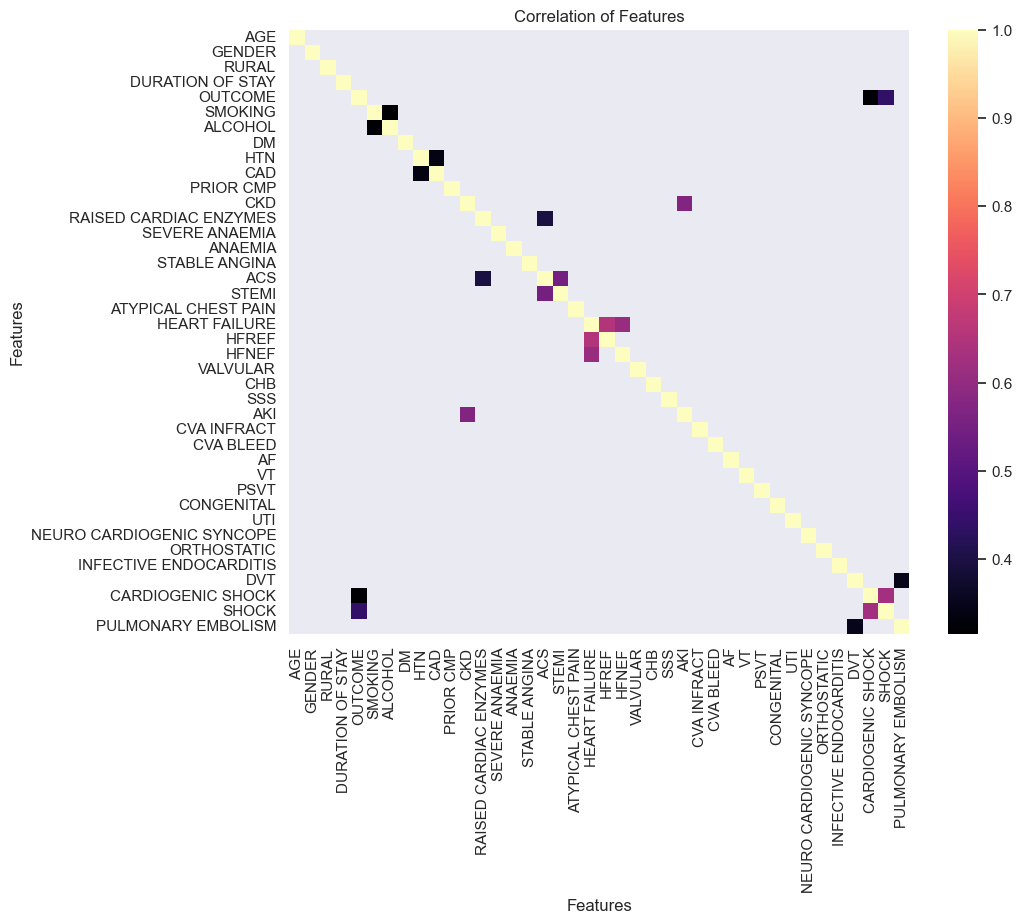

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations, excluding null values
corr = data.corr()

# Only show correlations that are more than 0.3. This correlation coefficient is used as it is considered as 'Moderate' association
corr = corr[(corr >= 0.3)]

# Plot a heatmap of the correlations
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='magma')
plt.title('Correlation of Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

###### From the correlation matrix above, the features that give **significant correlation with 'Duration of Stay' with > 0.3** is when emergency patient experiencing:


*   Cardiogenic Shock
*   Shock



##**4. Modelling**

The dataset is split into 80% - 20% as a training and a testing set respectively for evaluating the model performance. Upon splitting the dataset, the sizes of the training and testing set are 8739 and 2185 respectively.

The following models are evaluated, with metrics including R-squared, mean absolute error, mean squared error and root mean squared error:

(1) Linear Regression

(2) Decision Tree Regression

(3) Random Forest Regression

(4) Support Vector Regression

(5) Bayesian Ridge Regression

(6) Gradient Boosting Regression

(7) Elastic Net Regression

(8) Light Gradient Boosting Machine Regression

(9) Extreme Gradient Boosting Regression

(10) K-Nearest Neighbors Regression

Cross validation technique will be applied to the best model to obtain optimal hyperparameters / configurations

In [38]:
# Import library for training - testing set split
from sklearn.model_selection import train_test_split 

# Split dataset into 80-20
def split_data(data):
    #test train split
    X = data.drop(['DURATION OF STAY'], axis=1)
    y = data['DURATION OF STAY'].values # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) # 80-20% split with random state (seed) of 42

    print("-" * 80,  "\nTraining set size: ", len(y_train), "\nTesting set size: ", len(y_test), "\n", "-" * 80)
    return X_train, X_test, y_train, y_test


print("\nTraining vs Testing set:")
X_train_initial ,X_test_initial ,y_train_initial ,y_test_initial = split_data(imputed_data)


Training vs Testing set:
-------------------------------------------------------------------------------- 
Training set size:  8739 
Testing set size:  2185 
 --------------------------------------------------------------------------------


In [39]:
# Import libraries for modelling
import sklearn
from sklearn.linear_model import LinearRegression      # Multiple Linear Regression, order of x = 1
from sklearn.tree import DecisionTreeRegressor         # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor     # Random Forest Regression
from sklearn.svm import SVR                            # Support Vector Regression
from sklearn.linear_model import BayesianRidge         # Bayesian Ridge Regression
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Regression
from sklearn.linear_model import ElasticNet            # Elastic Net Regression
from lightgbm import LGBMRegressor                     # Light Gradient Boosting Machine Regression
from xgboost.sklearn import XGBRegressor               # Extreme Gradient Boosting Regression
from sklearn.neighbors import KNeighborsRegressor      # K-Nearest Neighbors Regression
from sklearn import neighbors                         
from sklearn.model_selection import GridSearchCV       # GridSearch to determine best hyperparameters for kNN
from sklearn import metrics                            # Metrics for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures   # Polynomial Linear Regression, non-linear terms
import pickle                                          # For deployment

In [40]:
# Before proceed with fitting models, we determine the optimal k for kNN Regression
params = {'n_neighbors': list(range(1, 49))}
          
knn = neighbors.KNeighborsRegressor(n_jobs = -1)

model = GridSearchCV(knn, params, cv = 10)
model.fit(X_train_initial, y_train_initial)
model.best_params_ 

{'n_neighbors': 25}

In [41]:
# Models used:
# (1) Linear Regression
# (2) Decision Tree Regression
# (3) Random Forest Regression
# (4) Support Vector Regression
# (5) Bayesian Ridge Regression
# (6) Gradient Boosting Regression
# (7) Elastic Net Regression
# (8) Light Gradient Boosting Machine Regression
# (9) Extreme Gradient Boosting Regression
# (10) k-Nearest neighbors Regression

LinearR = LinearRegression(n_jobs=-1).fit(X_train_initial, y_train_initial)                                # (1)
DecisionT = DecisionTreeRegressor(random_state = 42).fit(X_train_initial, y_train_initial)                 # (2) 
RandomForestR = RandomForestRegressor(random_state = 42, n_jobs=-1).fit(X_train_initial, y_train_initial)  # (3)
SupportVectorR = SVR().fit(X_train_initial, y_train_initial)                                               # (4)
BayesianR = BayesianRidge().fit(X_train_initial, y_train_initial)                                          # (5)
GradientB = GradientBoostingRegressor(random_state = 42).fit(X_train_initial, y_train_initial)             # (6)
ElasticN = ElasticNet(random_state = 42).fit(X_train_initial, y_train_initial)                             # (7)
LightGBM = LGBMRegressor(random_state = 42, n_jobs=-1).fit(X_train_initial, y_train_initial)               # (8)
XGBR = XGBRegressor(random_state = 42, n_jobs=-1).fit(X_train_initial, y_train_initial)                    # (9) 
kNearestN = KNeighborsRegressor(n_neighbors = 44, n_jobs=-1).fit(X_train_initial, y_train_initial)         # (10)

In [42]:
models = [LinearR, DecisionT, RandomForestR, SupportVectorR, BayesianR, GradientB, ElasticN, LightGBM, XGBR, kNearestN] 

def Regressions(models, x_train, x_test, y_train, y_test):   
    model_performance = pd.DataFrame()
    
    for model in models:
        regression_model = model

        # Prediction using test set 
        y_pred = regression_model.predict(x_test)

        # R-squared (Coefficient of determination) 
        # Proportion of the variation in the dependent variable that is predictable from the independent variable
        r_squared = metrics.r2_score(y_test, y_pred)
        
        # Mean Absolute Error (MAE)
        # Average of the absolute values of individual prediction errors over all instances in the test set
        mae = metrics.mean_absolute_error(y_test, y_pred)

        # Mean Squared Error (MSE) 
        # Average squared difference between the predicted values and the actual value
        mse = metrics.mean_squared_error(y_test, y_pred)

        # Root Mean Squared Error (RMSE)
        # Standard deviation of the residuals (prediction errors)
        rmse = mse ** 0.5

        # Storing results in dataframe
        results =  pd.DataFrame({
            'Model': [str(type(model).__name__)],
            'R-squared': [round(r_squared, 4)],
            'Mean Absolute Error (MAE)': [round(mae, 4)],
            'Mean Squared Error (MSE)': [round(mse, 4)],
            'Root Mean Squared Error (RMSE)': [round(rmse, 4)]            
        })

        model_performance = pd.concat([model_performance, results], ignore_index = True)
        
    return model_performance
    
# Display results, sorted by coefficient of determination in descending order
model_performance = Regressions(models, X_train_initial, X_test_initial, y_train_initial, y_test_initial)
model_performance.sort_values('R-squared', ascending = False)

Model  R-squared  Mean Absolute Error (MAE)  \
2      RandomForestRegressor     0.2216                     2.8450   
7              LGBMRegressor     0.2070                     2.9644   
8               XGBRegressor     0.1543                     3.0247   
5  GradientBoostingRegressor     0.1190                     3.0650   
4              BayesianRidge     0.0773                     3.2063   
0           LinearRegression     0.0763                     3.2064   
9        KNeighborsRegressor     0.0410                     3.2447   
6                 ElasticNet     0.0059                     3.4045   
3                        SVR    -0.0243                     3.2493   
1      DecisionTreeRegressor    -0.5801                     3.8011   

   Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  
2                   19.3453                          4.3983  
7                   19.7086                          4.4394  
8                   21.0174                          4.5845  
5                   21.8945                          4.6792  
4                   22.9332                          4.7889  
0                   22.9573                          4.7914  
9                   23.8334                          4.8819  
6                   24.7072                          4.9706  
3                   25.4576                          5.0456  
1                   39.2706                          6.2666

From the results above, for the present problem, the best performing model is Random Forest with the highest R-squared value (Coefficient of Determination) and least root mean squared error (RMSE).

However, only about 22.16% of the variation in patients' duration of stay can be explained by the independent variables in the dataset by using Random Forest Regressor.

To improve model performance, we perform GridSearch with cross validation on Random Forest model to obtain the best hyperparameters.

By doing so, the accuracy / loss for every combination of hyperparameters are computed and we can select the one with the best performance.

In [43]:
# Perform GridSearch with cross validation on Random Forest model to obtain best hyperparameters, then re-evaluate
# As the GridSearch takes up a lot of compute power and time, the number of parameter is reduced to avoid running for too long
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, None],
    'max_leaf_nodes': [10, 20, None]
         }

search = GridSearchCV(RandomForestRegressor(n_jobs = -1), params, cv = 10)
RF_Search_Result = search.fit(X_train_initial, y_train_initial)
print("Best configurations of Random Forest Model:\n", RF_Search_Result.best_params_)
print("\nAverage cross-validated score of the best_estimator: ", RF_Search_Result.best_score_)

Best configurations of Random Forest Model:
 {'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 300}

Average cross-validated score of the best_estimator:  0.2171994421765792


In [44]:
# "Best" model evaluation on the testing dataset
RF_Best_Model = RF_Search_Result.best_estimator_
y_test_pred = RF_Best_Model.predict(X_test_initial)

r_squared_RF = metrics.r2_score(y_test_initial, y_test_pred)
mae_RF = metrics.mean_absolute_error(y_test_initial, y_test_pred)
mse_RF = metrics.mean_squared_error(y_test_initial, y_test_pred)
rmse_RF = mse_RF ** 0.5
        
print('R-squared\t\t\t: ', round(r_squared_RF, 4))
print('Mean Absolute Error (MAE)\t: ', round(mae_RF, 4))
print('Mean Squared Error (MSE)\t: ', round(mse_RF, 4))
print('Root Mean Squared Error (RMSE)\t: ', round(rmse_RF, 4))

R-squared			:  0.2263
Mean Absolute Error (MAE)	:  2.8394
Mean Squared Error (MSE)	:  19.2288
Root Mean Squared Error (RMSE)	:  4.3851


In [45]:
# Save the trained model with best performance to disk
filename = 'RFmodel.pkl'
pickle.dump(RF_Best_Model, open(filename, 'wb')) 

# Load the model from disk, for future deployment / predictions
loaded_model = pickle.load(open(filename, 'rb'))

##**5. Deployment**

The output of the notebook is execute with papermill, it is then deploy to Github Pages for web hosting. Below is the link to deployed page:

https://samueltan3972.github.io/WQD7003-DataAnalytics.html

In [46]:
!pip install papermill

In [1]:
# The result of the ipynb is render and save with papermill
import papermill as pm

pm.execute_notebook(
   'WQD7003_DATA_ANALYTICS_Group_5.ipynb',
   'WQD7003_output.ipynb'
)

##**6. Project Close Out and Restropective Learning**

As part of the project completion, below deliverables are produced for project close out:
*   Group 5 Project Report via iPython Notebook
*   Product Showcase via Github Page
*   Project Presentation via pre-recording

The team also conduct restrospective session internally to evaluate the overall experience in delivering the project by capturing the key success stories, main challenges and further improvement that can be made in the future:
 

**1. What went well**
*   Great collaboration within the team and leveraging each of members strengths and technical skills to execute the project
*   Manage to complete all the process flow in CRISP-DM.
*   Time Management and team work to complete the whole project


**2. What are the main challenges**
*   Managing high numbers of categorical variables which require further understanding on the data and how does it relates to the other features 
*   Lack of domain knowledge expert in medical field to understand the meaning and context on the data
*   Lack of advanced knowledge in modelling. 
*   Lack of knowledge in certain areas of modelling 

**3. What can be improved**
*   Further exploration/validation on other types of machine learning models which may also provide suitable or better result to study the patient admission
*   The accuracy (R2-squared) score of the prediction model

